In [ ]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [ ]:
df = pd.read_csv('./data/final/target_git_h_wekan_zulip_taiga.csv', sep = ';', index_col=0)

In [ ]:
import re
def extract_admission_year(group):
    if pd.isna(group):
        return None
    group = group.upper().strip()
    match = re.search(r'\d{2}', group)  
    if match:
        year = int('20' + match.group(0)) 
    else:

        year = None
    return year

def get_category(score):
    if score >= 8:
        return 'Отл'
    elif score >= 6:
        return  'Хор'
    elif score >= 4:
        return 'Уд'
    else:
        return 'Неуд'

df['start_study_year'] = df['student_group'].apply(extract_admission_year)

df['stepen'] = df['student_group'].apply(lambda x: str(x).upper().strip()[0])
df['course'] = df['year'].apply(lambda x: int(x.split('-')[-1])) - df['start_study_year']
df['activity_duration_zulip'] = df['activity_duration_zulip'].apply(lambda x: x.split(' ')[0] if isinstance(x, str) and 'days' in x else np.nan)

df['isna'] = df['isna'].notna()
df['rate_total'] = np.where(((df['isna'] == True) & (df.rate_total.isna())), 0, df.rate_total)


df['target'] = np.where((df['rate_total'] >= 4), 1, 0)
df['target_multiclass'] = df['rate_total'].apply(get_category)


In [ ]:
git_cols = df.columns[df.columns.str.endswith('git')].drop('source_git')
wekan_cols = df.columns[df.columns.str.endswith('wekan')].drop(['wekan', 'date_wekan', 'source_wekan', 'assignee_id_wekan'])

taiga_cols = df.columns[df.columns.str.endswith('taiga')].drop(['taiga', 'date_taiga', 'assignee_id_user_taiga',
       'project_id_project_taiga', 'users_list_project_taiga', 'projects_list_user_taiga', 'assignee_name_user_taiga', 'project_created_at_project_taiga',
       'project_description_project_taiga', 'project_name_project_taiga', 'first_activity_user_taiga', 'last_activity_user_taiga', 'source_taiga'])

zulip_cols = df.columns[df.columns.str.endswith('zulip')].drop(['zulip', 'full_name_zulip', 'source_zulip', 'person_id_zulip', 'first_activity_time_zulip',
       'last_activity_time_zulip', 'favorite_topic_zulip', 'person_streams_zulip', 'activity_duration_zulip',
       'favorite_stream_zulip', 'person_topics_zulip',])

h_cols = ['wekan', 'zulip', 'taiga']


othr_cols = ['project_head', 'stepen', 'course', 'year']
target_cols = ['isna', 'target_multiclass', 'target', 'rate_total']
id_cols = ['student_group','student_name', 'person_id', 'project_id']

all_cols = np.concatenate([target_cols, othr_cols, zulip_cols, wekan_cols, taiga_cols, git_cols, id_cols])
feature_cols = np.concatenate([zulip_cols, wekan_cols, taiga_cols, git_cols, othr_cols, id_cols])

# анализ признаков отдельных сервисов

In [ ]:
df[h_cols]

wekan  zulip  taiga
0      True   True   True
1      True  False  False
2      True  False  False
3      True   True  False
4      True  False  False
...     ...    ...    ...
1742   True  False  False
1743   True  False  False
1744  False  False   True
1745   True  False  False
1746   True  False  False

[1747 rows x 3 columns]

In [ ]:
df[git_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1746
Data columns (total 4 columns):
 #   Column                              Non-Null Count  Dtype  
---  ------                              --------------  -----  
 0   avg_operations_commit_git           460 non-null    float64
 1   student_operation_contribution_git  460 non-null    float64
 2   avg_dt_between_commits_git          460 non-null    float64
 3   student_commits_contribution_git    460 non-null    float64
dtypes: float64(4)
memory usage: 68.2 KB


In [ ]:
df[git_cols].describe()


avg_operations_commit_git  student_operation_contribution_git  \
count                 460.000000                        4.600000e+02   
mean                    0.499829                        6.179005e-01   
std                     0.169590                        4.243480e-01   
min                     0.082137                        4.100267e-07   
25%                     0.387093                        1.355286e-01   
50%                     0.496516                        9.154849e-01   
75%                     0.609020                        1.000000e+00   
max                     1.000000                        1.000000e+00   

       avg_dt_between_commits_git  student_commits_contribution_git  
count                  460.000000                        460.000000  
mean                     0.565915                          0.776917  
std                      0.145465                          0.313574  
min                      0.054226                          0.025482  
25%                      0.482943                          0.548683  
50%                      0.570461                          1.000000  
75%                      0.673130                          1.000000  
max                      0.940209                          1.000000

In [ ]:
df[wekan_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1746
Data columns (total 5 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   created_count_wekan         935 non-null    float64
 1   completed_count_wekan       935 non-null    float64
 2   hours_credited_wekan        935 non-null    float64
 3   card_completed_total_wekan  935 non-null    float64
 4   card_created_total_wekan    935 non-null    float64
dtypes: float64(5)
memory usage: 81.9 KB


In [ ]:
df[wekan_cols].describe()


created_count_wekan  completed_count_wekan  hours_credited_wekan  \
count           935.000000             935.000000            935.000000   
mean              0.890909               2.491979             27.357219   
std               1.902571               3.569993             46.859198   
min               0.000000               0.000000              0.000000   
25%               0.000000               0.000000              0.000000   
50%               0.000000               1.000000             13.000000   
75%               1.000000               3.000000             35.000000   
max              15.000000              35.000000            435.000000   

       card_completed_total_wekan  card_created_total_wekan  
count                  935.000000                935.000000  
mean                    63.249198                 57.043850  
std                     77.101069                 47.423659  
min                      0.000000                  1.000000  
25%                     18.000000                 26.000000  
50%                     41.000000                 46.000000  
75%                     94.000000                 71.000000  
max                    572.000000                326.000000

In [ ]:
df[taiga_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1746
Data columns (total 24 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   created_count_taiga                   208 non-null    float64
 1   completed_count_taiga                 208 non-null    float64
 2   hours_credited_taiga                  208 non-null    float64
 3   card_completed_total_taiga            208 non-null    float64
 4   card_created_total_taiga              208 non-null    float64
 5   unique_projects_count_user_taiga      208 non-null    float64
 6   total_hours_user_taiga                208 non-null    float64
 7   average_hours_user_taiga              207 non-null    float64
 8   median_hours_user_taiga               208 non-null    float64
 9   max_hours_user_taiga                  208 non-null    float64
 10  min_hours_user_taiga                  208 non-null    float64
 11  card_assigned_use

In [ ]:
df[taiga_cols].describe().T

count         mean          std  \
created_count_taiga                   208.0     1.216346     2.310723   
completed_count_taiga                 208.0     2.923077     3.784515   
hours_credited_taiga                  208.0    21.250000    34.217336   
card_completed_total_taiga            208.0    52.850962    75.458546   
card_created_total_taiga              208.0    40.697115    60.792032   
unique_projects_count_user_taiga      208.0     2.389423     1.835581   
total_hours_user_taiga                208.0   275.495192   223.974291   
average_hours_user_taiga              207.0     6.830242     5.225422   
median_hours_user_taiga               208.0     5.384615     4.864706   
max_hours_user_taiga                  208.0    23.725962    26.223250   
min_hours_user_taiga                  208.0     1.250000     2.345723   
card_assigned_user_taiga              208.0    60.254808    61.791823   
cards_created_user_taiga              208.0    41.480769    50.089096   
cards_completed_user_taiga            208.0    55.509615    56.881434   
hours_last_month_user_taiga           208.0     0.000000     0.000000   
hours_last_year_user_taiga            208.0     0.024038     0.346688   
unique_cards_project_taiga            208.0   292.788462   266.702721   
completed_cards_project_taiga         208.0   268.384615   247.071165   
total__hours_project_taiga            208.0  1456.884615  1144.453892   
avg_completion_days_project_taiga     208.0    24.671490    17.133757   
max_hours_per_card_project_taiga      208.0    46.355769    44.211048   
min_hours_per_card_project_taiga      208.0     0.716346     1.708553   
average_hours_per_card_project_taiga  207.0     6.837311     3.638476   
unique_users_project_taiga            208.0    10.769231     6.786219   

                                          min         25%          50%  \
created_count_taiga                   0.00000    0.000000     0.000000   
completed_count_taiga                 0.00000    0.000000     1.000000   
hours_credited_taiga                  0.00000    0.000000     8.000000   
card_completed_total_taiga            0.00000   15.000000    32.500000   
card_created_total_taiga              4.00000   17.000000    32.000000   
unique_projects_count_user_taiga      1.00000    1.000000     2.000000   
total_hours_user_taiga                0.00000  133.000000   220.000000   
average_hours_user_taiga              1.21000    3.720000     5.740000   
median_hours_user_taiga               0.00000    2.000000     4.000000   
max_hours_user_taiga                  0.00000   11.500000    18.000000   
min_hours_user_taiga                  0.00000    0.000000     0.000000   
card_assigned_user_taiga              1.00000   21.500000    36.000000   
cards_created_user_taiga              0.00000    9.000000    24.000000   
cards_completed_user_taiga            0.00000   19.750000    33.000000   
hours_last_month_user_taiga           0.00000    0.000000     0.000000   
hours_last_year_user_taiga            0.00000    0.000000     0.000000   
unique_cards_project_taiga            2.00000   95.000000   227.000000   
completed_cards_project_taiga         0.00000   91.000000   198.000000   
total__hours_project_taiga            0.00000  650.000000  1241.000000   
avg_completion_days_project_taiga     0.00000   11.860000    20.810000   
max_hours_per_card_project_taiga      0.00000   17.000000    30.000000   
min_hours_per_card_project_taiga      0.00000    0.000000     0.000000   
average_hours_per_card_project_taiga  2.30303    4.070588     6.044521   
unique_users_project_taiga            1.00000    6.000000     9.000000   

                                              75%      max  
created_count_taiga                      2.000000    18.00  
completed_count_taiga                    4.000000    21.00  
hours_credited_taiga                    30.000000   247.00  
card_completed_total_taiga              66.000000   678.00  
card_created_total_taiga                47.250000   601.

In [ ]:
taiga_cols

Index(['created_count_taiga', 'completed_count_taiga', 'hours_credited_taiga',
       'card_completed_total_taiga', 'card_created_total_taiga',
       'unique_projects_count_user_taiga', 'total_hours_user_taiga',
       'average_hours_user_taiga', 'median_hours_user_taiga',
       'max_hours_user_taiga', 'min_hours_user_taiga',
       'card_assigned_user_taiga', 'cards_created_user_taiga',
       'cards_completed_user_taiga', 'hours_last_month_user_taiga',
       'hours_last_year_user_taiga', 'unique_cards_project_taiga',
       'completed_cards_project_taiga', 'total__hours_project_taiga',
       'avg_completion_days_project_taiga', 'max_hours_per_card_project_taiga',
       'min_hours_per_card_project_taiga',
       'average_hours_per_card_project_taiga', 'unique_users_project_taiga'],
      dtype='object')

In [ ]:
df[zulip_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1746
Data columns (total 8 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   total_activity_zulip              937 non-null    float64
 1   reactions_added_zulip             937 non-null    float64
 2   messages_created_zulip            937 non-null    float64
 3   mentions_zulip                    937 non-null    float64
 4   messages_updated_zulip            937 non-null    float64
 5   reactions_removed_zulip           937 non-null    float64
 6   max_activity_in_single_day_zulip  937 non-null    float64
 7   avg_activity_per_day_zulip        937 non-null    float64
dtypes: float64(8)
memory usage: 122.8 KB


In [ ]:
df[['total_activity_zulip', 'reactions_added_zulip',
       'messages_created_zulip', 'mentions_zulip', 'messages_updated_zulip',
       'reactions_removed_zulip', 'max_activity_in_single_day_zulip',
       'avg_activity_per_day_zulip']].describe()


total_activity_zulip  reactions_added_zulip  messages_created_zulip  \
count            937.000000             937.000000              937.000000   
mean              82.050160              24.129136               57.921025   
std              229.702415              85.364536              148.195197   
min                0.000000               0.000000                0.000000   
25%                2.000000               0.000000                2.000000   
50%               11.000000               1.000000                9.000000   
75%               45.000000              10.000000               36.000000   
max             1971.000000             829.000000             1142.000000   

       mentions_zulip  messages_updated_zulip  reactions_removed_zulip  \
count      937.000000              937.000000               937.000000   
mean        50.083244                1.084312                 0.054429   
std        129.156325                8.263576                 0.340035   
min          0.000000                0.000000                 0.000000   
25%          2.000000                0.000000                 0.000000   
50%          8.000000                0.000000                 0.000000   
75%         35.000000                0.000000                 0.000000   
max       1045.000000               98.000000                 3.000000   

       max_activity_in_single_day_zulip  avg_activity_per_day_zulip  
count                        937.000000                  937.000000  
mean                          17.479189                    3.460650  
std                           29.979299                    4.918572  
min                            0.000000                    0.000000  
25%                            2.000000                    1.000000  
50%                            5.000000                    1.714286  
75%                           20.000000                    3.692308  
max                          285.000000                   36.633333

In [ ]:
sorted(df.columns)

['accepted_credits',
 'activity_duration_zulip',
 'assignee_id_user_taiga',
 'assignee_id_wekan',
 'assignee_name_user_taiga',
 'average_hours_per_card_project_taiga',
 'average_hours_user_taiga',
 'avg_activity_per_day_zulip',
 'avg_completion_days_project_taiga',
 'avg_dt_between_commits_git',
 'avg_operations_commit_git',
 'card_assigned_user_taiga',
 'card_completed_total_taiga',
 'card_completed_total_wekan',
 'card_created_total_taiga',
 'card_created_total_wekan',
 'cards_completed_user_taiga',
 'cards_created_user_taiga',
 'completed_cards_project_taiga',
 'completed_count_taiga',
 'completed_count_wekan',
 'control_type',
 'course',
 'created_count_taiga',
 'created_count_wekan',
 'credits_rup',
 'date_taiga',
 'date_wekan',
 'defense_date',
 'defense_date_minus2months',
 'earned_credits',
 'earned_hours',
 'favorite_stream_zulip',
 'favorite_topic_zulip',
 'first_activity_time_zulip',
 'first_activity_user_taiga',
 'full_name_zulip',
 'hours_credited_taiga',
 'hours_credited_

In [ ]:
len(feature_cols), len(all_cols)

(49, 53)

In [ ]:
set(df.columns) - set(all_cols)

{'accepted_credits',
 'activity_duration_zulip',
 'assignee_id_user_taiga',
 'assignee_id_wekan',
 'assignee_name_user_taiga',
 'control_type',
 'credits_rup',
 'date_taiga',
 'date_wekan',
 'defense_date',
 'defense_date_minus2months',
 'earned_credits',
 'earned_hours',
 'favorite_stream_zulip',
 'favorite_topic_zulip',
 'first_activity_time_zulip',
 'first_activity_user_taiga',
 'full_name_zulip',
 'last_activity_time_zulip',
 'last_activity_user_taiga',
 'person_id_zulip',
 'person_streams_zulip',
 'person_topics_zulip',
 'project_created_at_project_taiga',
 'project_description_project_taiga',
 'project_id_project_taiga',
 'project_name',
 'project_name_project_taiga',
 'projects_list_user_taiga',
 'rate_comission',
 'rate_doc',
 'rate_head',
 'slug',
 'source_git',
 'source_taiga',
 'source_wekan',
 'source_zulip',
 'start_study_year',
 'taiga',
 'users_list_project_taiga',
 'wekan',
 'zulip'}

In [ ]:
df[all_cols].describe()

target  rate_total       course  total_activity_zulip  \
count  1747.000000  1747.00000  1734.000000            937.000000   
mean      0.900401     6.74814     2.536909             82.050160   
std       0.299551     2.11106     0.982577            229.702415   
min       0.000000     0.00000    -9.000000              0.000000   
25%       1.000000     6.00000     2.000000              2.000000   
50%       1.000000     7.00000     3.000000             11.000000   
75%       1.000000     8.00000     3.000000             45.000000   
max       1.000000    10.00000     5.000000           1971.000000   

       reactions_added_zulip  messages_created_zulip  mentions_zulip  \
count             937.000000              937.000000      937.000000   
mean               24.129136               57.921025       50.083244   
std                85.364536              148.195197      129.156325   
min                 0.000000                0.000000        0.000000   
25%                 0.000000                2.000000        2.000000   
50%                 1.000000                9.000000        8.000000   
75%                10.000000               36.000000       35.000000   
max               829.000000             1142.000000     1045.000000   

       messages_updated_zulip  reactions_removed_zulip  \
count              937.000000               937.000000   
mean                 1.084312                 0.054429   
std                  8.263576                 0.340035   
min                  0.000000                 0.000000   
25%                  0.000000                 0.000000   
50%                  0.000000                 0.000000   
75%                  0.000000                 0.000000   
max                 98.000000                 3.000000   

       max_activity_in_single_day_zulip  ...  \
count                        937.000000  ...   
mean                          17.479189  ...   
std                           29.979299  ...   
min                            0.000000  ...   
25%                            2.000000  ...   
50%                            5.000000  ...   
75%                           20.000000  ...   
max                          285.000000  ...   

       max_hours_per_card_project_taiga  min_hours_per_card_project_taiga  \
count                        208.000000                        208.000000   
mean                          46.355769                          0.716346   
std                           44.211048                          1.708553   
min                            0.000000                          0.000000   
25%                           17.000000                          0.000000   
50%                           30.000000                          0.000000   
75%                           50.000000                          1.000000   
max                          160.000000                         16.000000   

       average_hours_per_card_project_taiga  unique_users_project_taiga  \
count                            207.000000                  208.000000   
mean                               6.837311                   10.769231   
std                                3.638476                    6.786219   
min                                2.303030                    1.000000   
25%                                4.070588                    6.000000   
50%                                6.044521                    9.000000   
75%                                7.987342                   14.000000   
max                               28.000000                   35.000000   

       avg_operations_commit_git  student_operation_contribution_git  \
count                 460.000000                        4.600000e+02   
mean                    0.499829                        6.179005e-01   
std                     0.169590                        4.243480e-01   
min                     0.082137                        4.100267e-07   
25%                     0.387093                       

In [ ]:
df[all_cols].info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1747 entries, 0 to 1746
Data columns (total 53 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   isna                                  1747 non-null   bool   
 1   target_multiclass                     1747 non-null   object 
 2   target                                1747 non-null   int32  
 3   rate_total                            1747 non-null   float64
 4   project_head                          807 non-null    object 
 5   stepen                                1747 non-null   object 
 6   course                                1734 non-null   float64
 7   year                                  1747 non-null   object 
 8   total_activity_zulip                  937 non-null    float64
 9   reactions_added_zulip                 937 non-null    float64
 10  messages_created_zulip                937 non-null    float64
 11  mentions_zulip   

In [ ]:
numerical_cols = df[feature_cols].select_dtypes(include=['number'])
num_numerical_cols = len(numerical_cols.columns)

categorical_cols = df[feature_cols].select_dtypes(exclude=['number'])
num_categorical_cols = len(categorical_cols.columns)

num_numerical_cols, num_categorical_cols

(44, 5)

In [ ]:
feature_cols

array(['total_activity_zulip', 'reactions_added_zulip',
       'messages_created_zulip', 'mentions_zulip',
       'messages_updated_zulip', 'reactions_removed_zulip',
       'max_activity_in_single_day_zulip', 'avg_activity_per_day_zulip',
       'created_count_wekan', 'completed_count_wekan',
       'hours_credited_wekan', 'card_completed_total_wekan',
       'card_created_total_wekan', 'created_count_taiga',
       'completed_count_taiga', 'hours_credited_taiga',
       'card_completed_total_taiga', 'card_created_total_taiga',
       'unique_projects_count_user_taiga', 'total_hours_user_taiga',
       'average_hours_user_taiga', 'median_hours_user_taiga',
       'max_hours_user_taiga', 'min_hours_user_taiga',
       'card_assigned_user_taiga', 'cards_created_user_taiga',
       'cards_completed_user_taiga', 'hours_last_month_user_taiga',
       'hours_last_year_user_taiga', 'unique_cards_project_taiga',
       'completed_cards_project_taiga', 'total__hours_project_taiga',
       'avg

In [ ]:
categorical_cols.columns

Index(['project_head', 'stepen', 'year', 'student_group', 'student_name'], dtype='object')

# Исключение дублей

In [ ]:
df=df[all_cols]

In [ ]:
df = df.drop_duplicates()
df = df.drop_duplicates(subset = feature_cols)

# анализ пропусков

<Axes: >

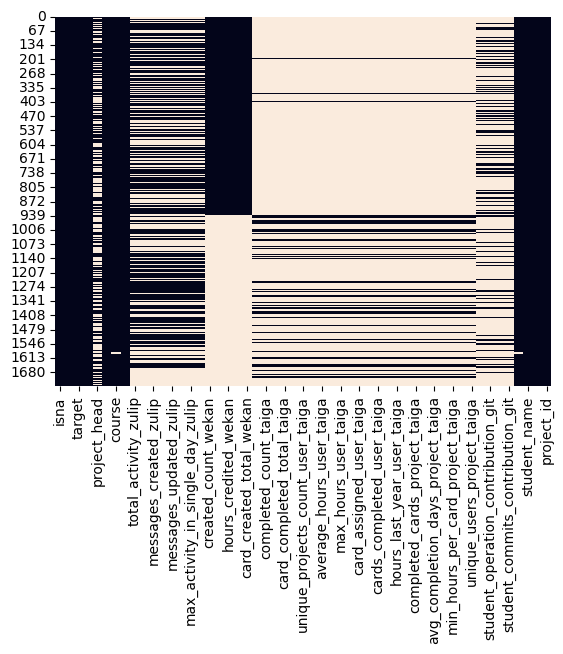

In [ ]:
sns.heatmap(df[all_cols].isnull(), cbar=False)

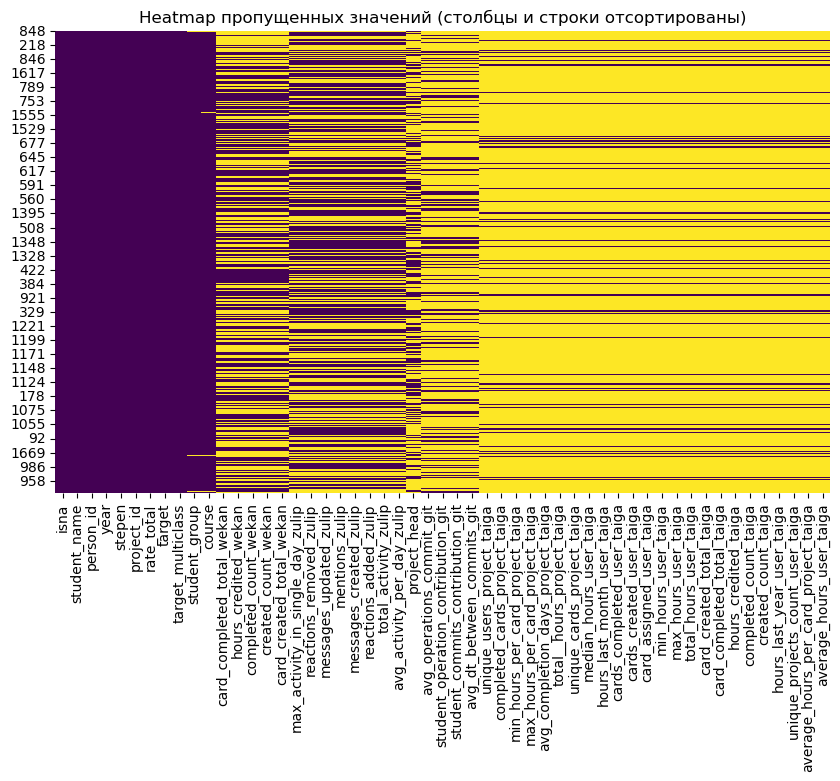

In [ ]:
missing_counts = df[all_cols].isnull().sum().sort_values()
sorted_cols = missing_counts.index.tolist()

df_sorted_cols = df[sorted_cols]

df_sorted = df_sorted_cols.sort_values(by=sorted_cols, ascending=False, na_position='last')

plt.figure(figsize=(10, 6))
sns.heatmap(df_sorted.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap пропущенных значений (столбцы и строки отсортированы)')
plt.show()

<Axes: >

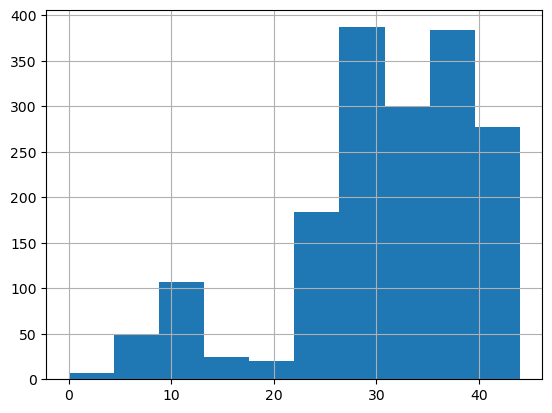

In [ ]:
df[feature_cols].isna().sum(axis = 1).sort_values().hist()

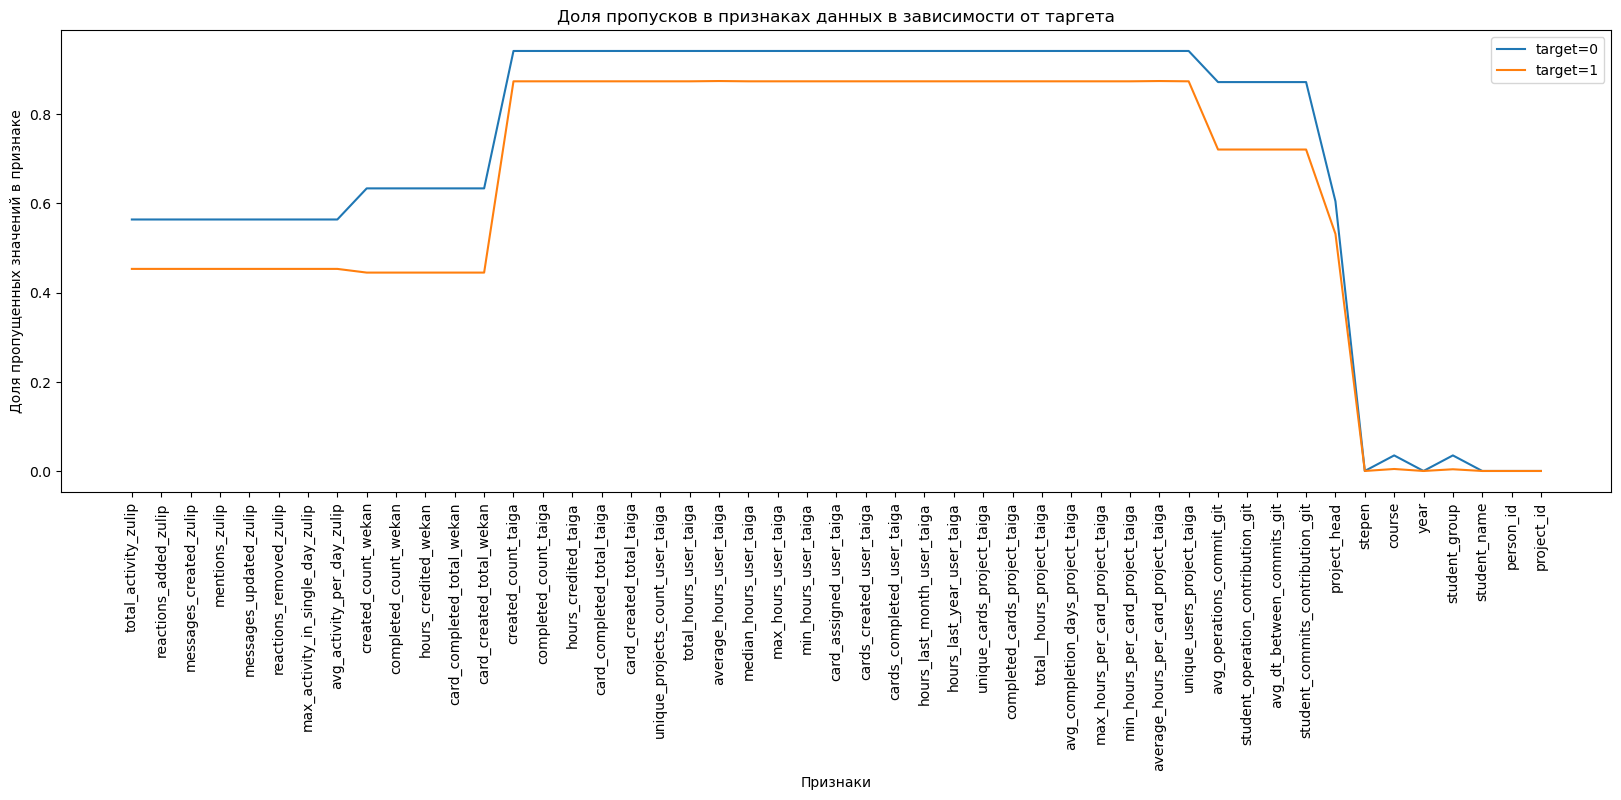

In [ ]:
plt.figure(figsize = (20, 6))
plt.plot(df[df.target == 0][feature_cols].isna().sum() / df[df.target == 0].shape[0], label = 'target=0')
plt.plot(df[df.target == 1][feature_cols].isna().sum() / df[df.target == 1].shape[0], label = 'target=1')
plt.legend()
plt.title("Доля пропусков в признаках данных в зависимости от таргета")
plt.xlabel('Признаки')
plt.ylabel('Доля пропущенных значений в признаке')
plt.xticks(rotation=90)
plt.show()

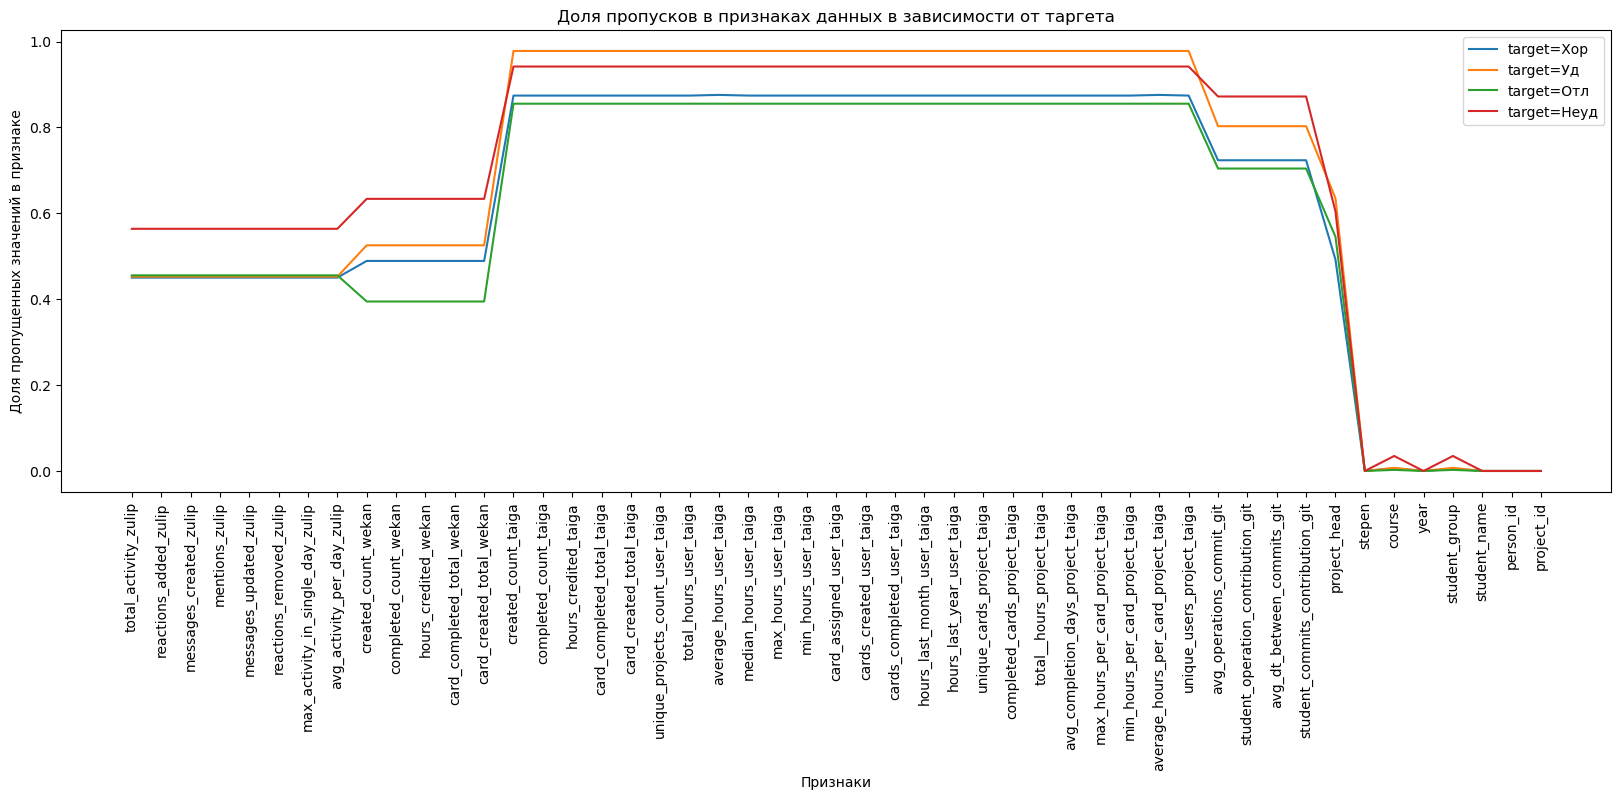

In [ ]:
plt.figure(figsize = (20, 6))
for y in df['target_multiclass'].unique():
    plt.plot(df[df.target_multiclass == y][feature_cols].isna().sum() / df[df.target_multiclass == y].shape[0], label = f'target={y}')
plt.legend()
plt.title("Доля пропусков в признаках данных в зависимости от таргета")

plt.xlabel('Признаки')
plt.ylabel('Доля пропущенных значений в признаке')
plt.xticks(rotation=90)
plt.show()

# удалим строки, в которых более 36 полей из 49 пустые

In [ ]:
set(df.columns) - set(feature_cols)

{'isna', 'rate_total', 'target', 'target_multiclass'}

In [ ]:
df_notna = df[~((df[feature_cols].isna().sum(axis = 1) > 36))]
df_notna.shape

(1234, 53)

In [ ]:
len(feature_cols)

49

In [ ]:
df_notna.target.value_counts() / df_notna.shape[0] * 100

1    91.896272
0     8.103728
Name: target, dtype: float64

In [ ]:
df_notna.target_multiclass.value_counts() / df_notna.shape[0] * 100

Отл     48.136143
Хор     36.304700
Неуд     8.103728
Уд       7.455429
Name: target_multiclass, dtype: float64

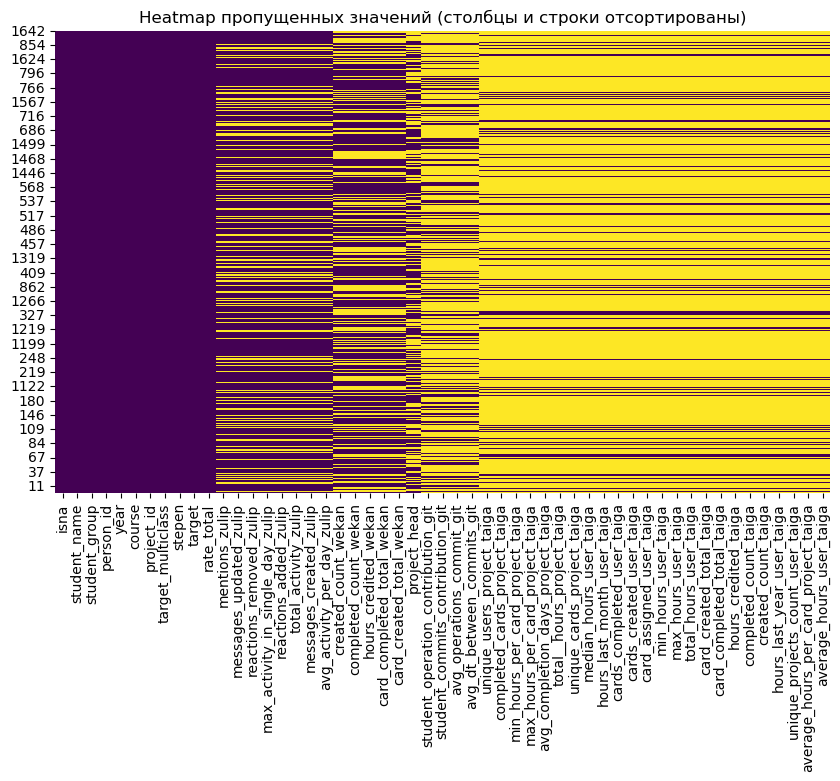

In [ ]:
missing_counts = df_notna[all_cols].isnull().sum().sort_values()
sorted_cols = missing_counts.index.tolist()

df_sorted_cols = df_notna[sorted_cols]

df_sorted = df_sorted_cols.sort_values(by=sorted_cols, ascending=False, na_position='last') 

plt.figure(figsize=(10, 6))
sns.heatmap(df_sorted.isnull(), cbar=False, cmap='viridis')
plt.title('Heatmap пропущенных значений (столбцы и строки отсортированы)')
plt.show()

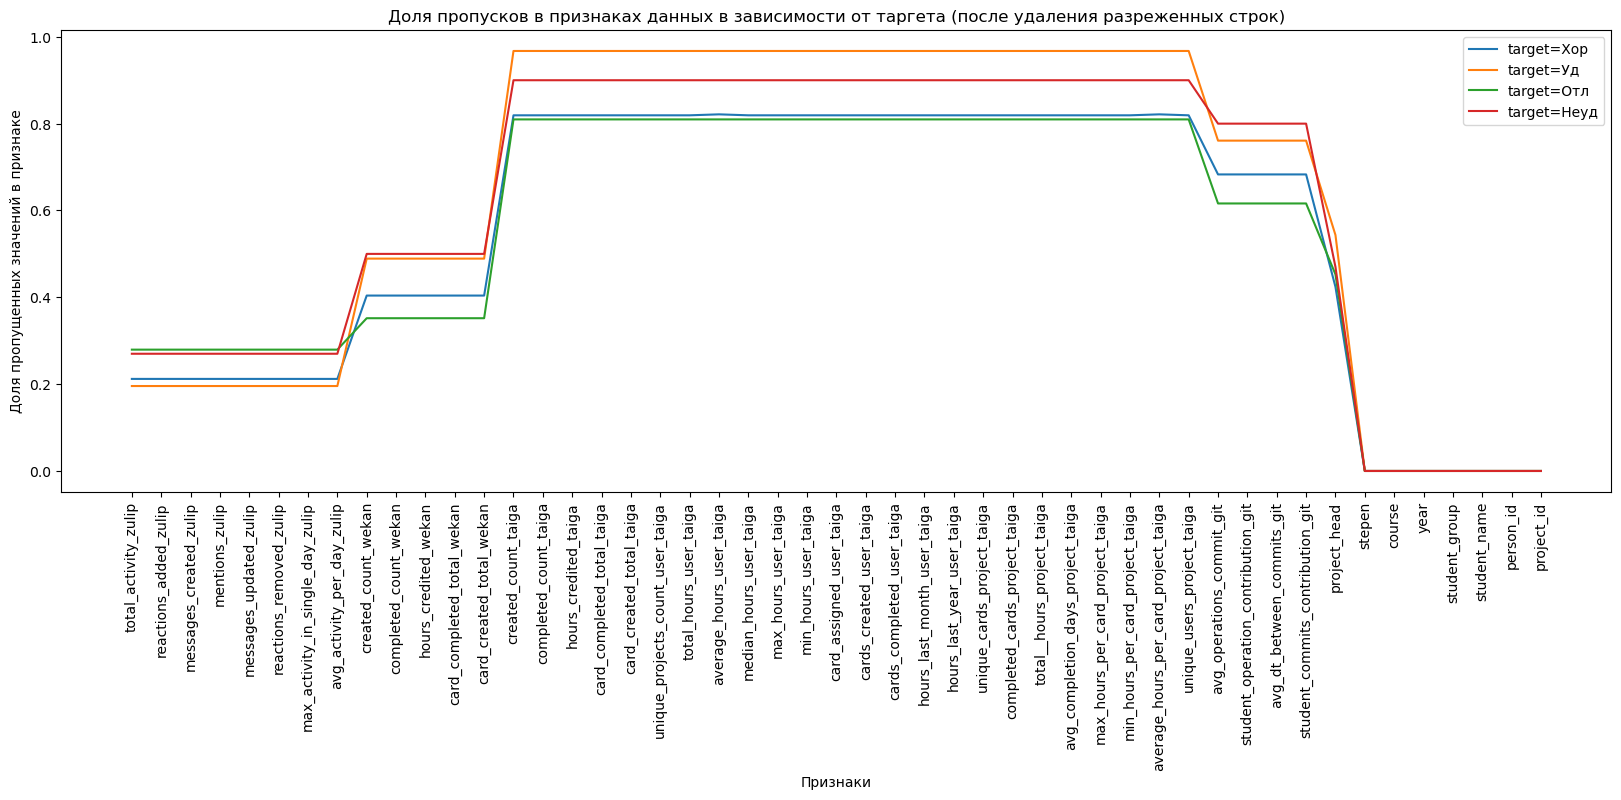

In [ ]:
plt.figure(figsize = (20, 6))
for y in df_notna['target_multiclass'].unique():
    plt.plot(df_notna[df_notna.target_multiclass == y][feature_cols].isna().sum() / df_notna[df_notna.target_multiclass == y].shape[0], label = f'target={y}')
plt.legend()
plt.title("Доля пропусков в признаках данных в зависимости от таргета (после удаления разреженных строк)")

plt.xlabel('Признаки')
plt.ylabel('Доля пропущенных значений в признаке')
plt.xticks(rotation=90)
plt.show()

In [ ]:
df_notna.shape

(1234, 53)

In [ ]:
df[all_cols].isna().sum().sort_values(ascending=False)

average_hours_per_card_project_taiga    1519
average_hours_user_taiga                1519
unique_projects_count_user_taiga        1518
cards_completed_user_taiga              1518
card_created_total_taiga                1518
total_hours_user_taiga                  1518
median_hours_user_taiga                 1518
max_hours_user_taiga                    1518
min_hours_user_taiga                    1518
card_assigned_user_taiga                1518
cards_created_user_taiga                1518
hours_last_month_user_taiga             1518
hours_credited_taiga                    1518
hours_last_year_user_taiga              1518
unique_cards_project_taiga              1518
completed_cards_project_taiga           1518
total__hours_project_taiga              1518
avg_completion_days_project_taiga       1518
max_hours_per_card_project_taiga        1518
min_hours_per_card_project_taiga        1518
card_completed_total_taiga              1518
completed_count_taiga                   1518
unique_use

In [ ]:
df.shape, df_notna.shape

((1725, 53), (1234, 53))

# анализ таргета бинарного

In [ ]:
df_notna['target_multiclass'].value_counts() / df_notna.shape[0] * 100


Отл     48.136143
Хор     36.304700
Неуд     8.103728
Уд       7.455429
Name: target_multiclass, dtype: float64

In [ ]:
df['target_multiclass'].value_counts() / df.shape[0] * 100


Отл     45.449275
Хор     37.101449
Неуд     9.565217
Уд       7.884058
Name: target_multiclass, dtype: float64

In [ ]:
df_notna['target'].value_counts() / df_notna.shape[0] * 100


1    91.896272
0     8.103728
Name: target, dtype: float64

In [ ]:
df['target'].value_counts() / df.shape[0] * 100

1    90.434783
0     9.565217
Name: target, dtype: float64

In [ ]:
df['target'].value_counts()

1    1560
0     165
Name: target, dtype: int64

In [ ]:
df_notna['target'].value_counts()


1    1134
0     100
Name: target, dtype: int64

In [ ]:
df['rate_total'].value_counts().sort_index()

0.0      27
1.0      38
2.0      47
3.0      53
4.0      71
5.0      65
6.0     254
7.0     386
8.0     532
9.0     215
10.0     37
Name: rate_total, dtype: int64

In [ ]:
df_notna['rate_total'].value_counts().sort_index()


0.0       9
1.0      18
2.0      32
3.0      41
4.0      45
5.0      47
6.0     169
7.0     279
8.0     410
9.0     160
10.0     24
Name: rate_total, dtype: int64

In [ ]:
df['isna'].value_counts() / df.shape[0] * 100

False    96.057971
True      3.942029
Name: isna, dtype: float64

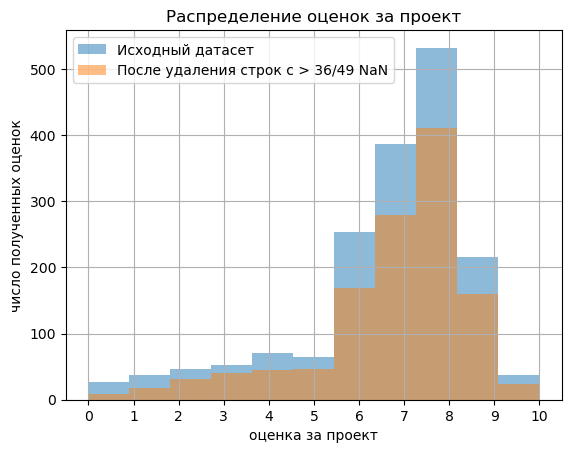

In [ ]:
import matplotlib.pyplot as plt
plt.hist(x=df['rate_total'], bins=11, alpha=.5, label='Исходный датасет')
df_notna['rate_total'].hist(bins=11, alpha=.5, label='После удаления строк с > 36/49 NaN')

plt.legend(loc='upper left')
plt.title('Распределение оценок за проект')
plt.xticks(np.arange(11))
plt.xlabel('оценка за проект')
plt.ylabel('число полученных оценок')
plt.show()

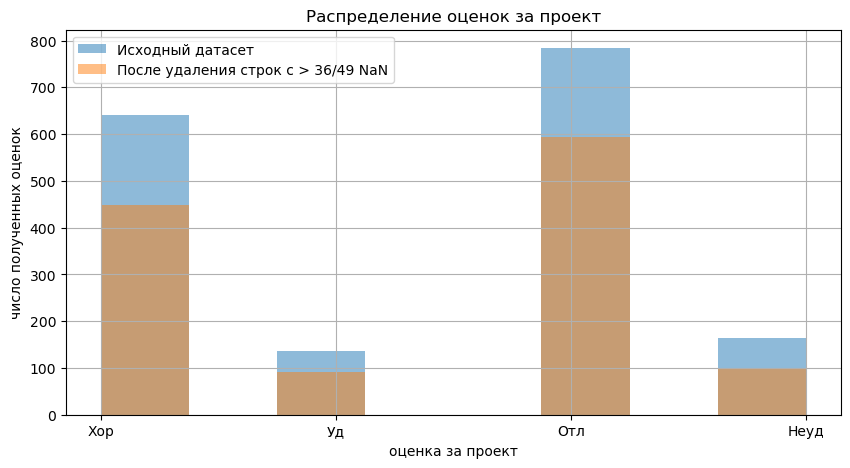

In [ ]:
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 5))
plt.hist(x=df['target_multiclass'], bins=8, alpha=.5, label='Исходный датасет')
df_notna['target_multiclass'].hist(bins=8, alpha=.5,label='После удаления строк с > 36/49 NaN')

plt.legend(loc='upper left')
plt.title('Распределение оценок за проект')
plt.xlabel('оценка за проект')
plt.ylabel('число полученных оценок')
plt.show()

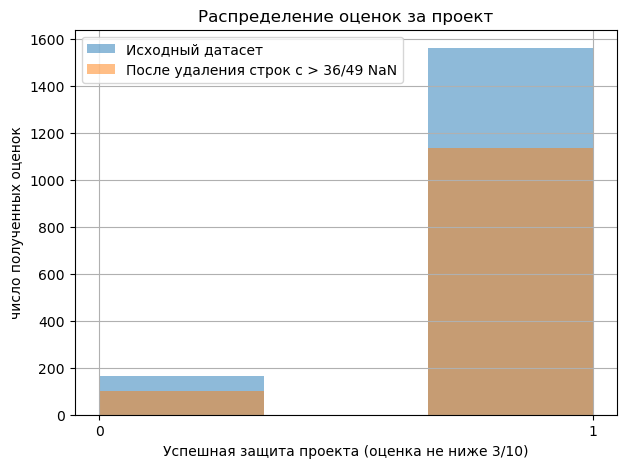

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize = (7, 5))

plt.hist(x=df['target'], bins=3, alpha=.5, label='Исходный датасет')
df_notna['target'].hist(bins=3, alpha=.5, label='После удаления строк с > 36/49 NaN')

plt.legend(loc='upper left')
plt.title('Распределение оценок за проект')
plt.xlabel('Успешная защита проекта (оценка не ниже 3/10)')
plt.xticks([0, 1])
plt.ylabel('число полученных оценок')
plt.show()

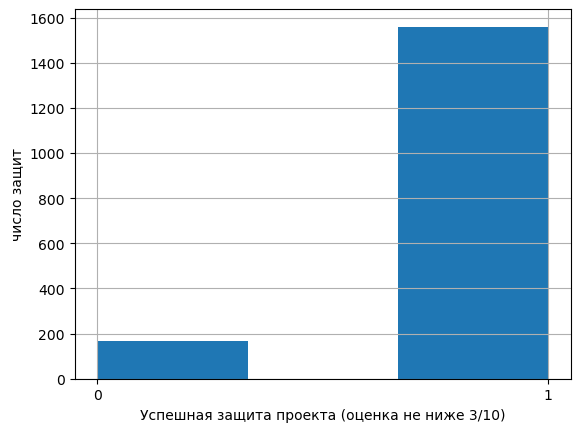

In [ ]:
df['target'].hist(bins=3)
plt.xticks(np.arange(2))
plt.xlabel('Успешная защита проекта (оценка не ниже 3/10)')
plt.ylabel('число защит')
plt.show()

In [ ]:
df['target'].value_counts()

1    1560
0     165
Name: target, dtype: int64

In [ ]:
df_notna['target'].value_counts()


1    1134
0     100
Name: target, dtype: int64

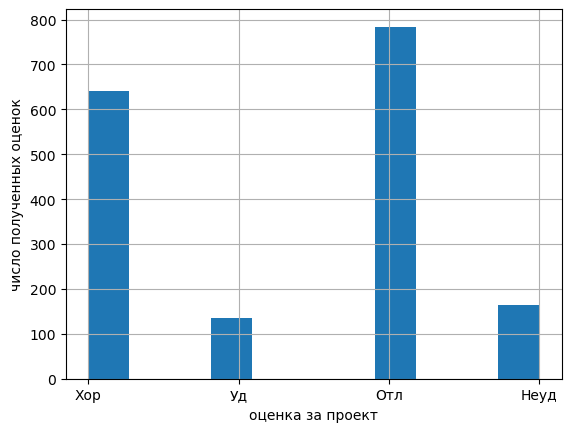

In [ ]:
df['target_multiclass'].hist(bins=11)
plt.xlabel('оценка за проект')
plt.ylabel('число полученных оценок')

plt.show()

In [ ]:
df['target_multiclass'].value_counts()

Отл     784
Хор     640
Неуд    165
Уд      136
Name: target_multiclass, dtype: int64

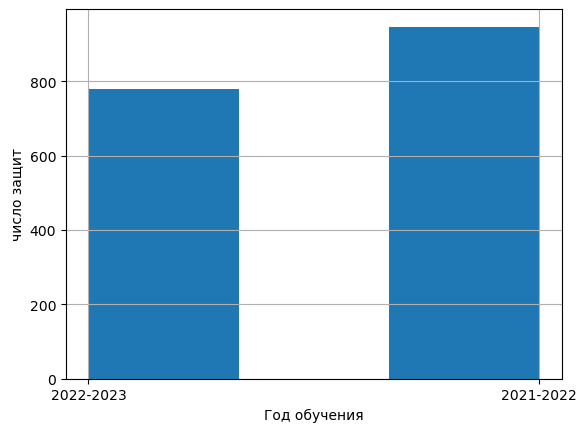

In [ ]:
df['year'].hist(bins=3)
plt.xlabel('Год обучения')
plt.ylabel('число защит')
plt.show()


In [ ]:
df = df[df.course >= 1]
df = df[~df.stepen.isin(['А', 'Я', 'Э'])]


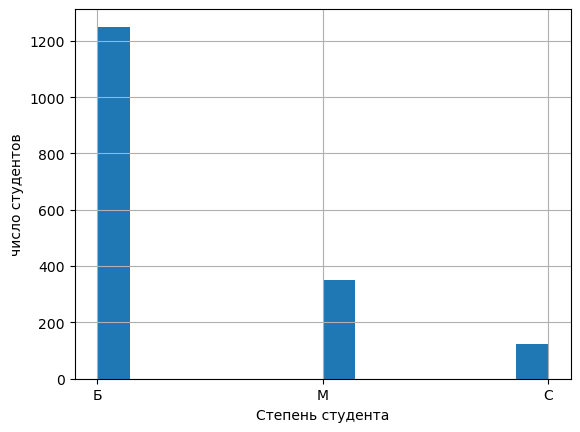

In [ ]:
df['stepen'].hist(bins=14)
plt.xlabel('Степень студента')
plt.ylabel('число студентов')
plt.show()


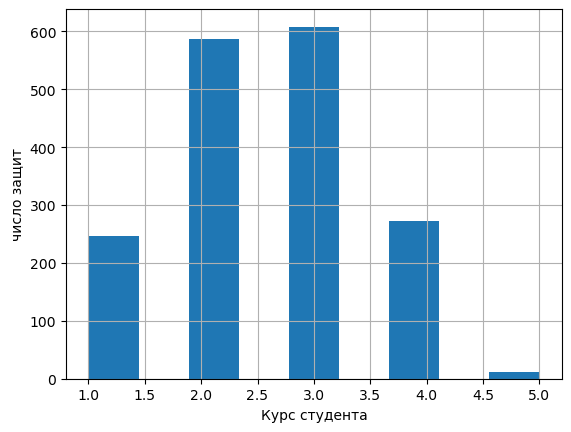

In [ ]:
df['course'].hist(bins=9)
plt.xlabel('Курс студента')
plt.ylabel('число защит')
plt.show()


In [ ]:
df['target'].value_counts(normalize=True)

1    0.904348
0    0.095652
Name: target, dtype: float64

In [ ]:
df['target_multiclass'].value_counts(normalize=True) * 100


Отл     45.449275
Хор     37.101449
Неуд     9.565217
Уд       7.884058
Name: target_multiclass, dtype: float64

In [ ]:
df['target_multiclass'].value_counts()

Отл     784
Хор     640
Неуд    165
Уд      136
Name: target_multiclass, dtype: int64

# describe

In [ ]:
df_notna.describe().T.shape

(46, 8)

In [ ]:
df_notna[git_cols].describe().T.round(2)


count  mean   std   min   25%   50%   75%  \
avg_operations_commit_git           412.0  0.49  0.17  0.08  0.38  0.49  0.61   
student_operation_contribution_git  412.0  0.62  0.42  0.00  0.14  0.90  1.00   
avg_dt_between_commits_git          412.0  0.56  0.15  0.05  0.48  0.57  0.66   
student_commits_contribution_git    412.0  0.77  0.32  0.03  0.54  1.00  1.00   

                                     max  
avg_operations_commit_git           1.00  
student_operation_contribution_git  1.00  
avg_dt_between_commits_git          0.94  
student_commits_contribution_git    1.00

In [ ]:
df_notna.describe().T.round(2)


count          mean           std  \
target                                1234.0  9.200000e-01  2.700000e-01   
rate_total                            1234.0  6.930000e+00  1.920000e+00   
course                                1234.0  2.600000e+00  9.200000e-01   
total_activity_zulip                   928.0  8.261000e+01  2.307000e+02   
reactions_added_zulip                  928.0  2.432000e+01  8.575000e+01   
messages_created_zulip                 928.0  5.829000e+01  1.488100e+02   
mentions_zulip                         928.0  5.041000e+01  1.297100e+02   
messages_updated_zulip                 928.0  1.090000e+00  8.300000e+00   
reactions_removed_zulip                928.0  5.000000e-02  3.400000e-01   
max_activity_in_single_day_zulip       928.0  1.748000e+01  3.007000e+01   
avg_activity_per_day_zulip             928.0  3.440000e+00  4.910000e+00   
created_count_wekan                    749.0  8.900000e-01  1.840000e+00   
completed_count_wekan                  749.0  2.370000e+00  3.250000e+00   
hours_credited_wekan                   749.0  2.571000e+01  4.440000e+01   
card_completed_total_wekan             749.0  6.694000e+01  8.044000e+01   
card_created_total_wekan               749.0  5.902000e+01  4.825000e+01   
created_count_taiga                    207.0  1.200000e+00  2.300000e+00   
completed_count_taiga                  207.0  2.920000e+00  3.790000e+00   
hours_credited_taiga                   207.0  2.129000e+01  3.430000e+01   
card_completed_total_taiga             207.0  5.231000e+01  7.523000e+01   
card_created_total_taiga               207.0  4.062000e+01  6.093000e+01   
unique_projects_count_user_taiga       207.0  2.400000e+00  1.840000e+00   
total_hours_user_taiga                 207.0  2.760300e+02  2.243800e+02   
average_hours_user_taiga               206.0  6.830000e+00  5.240000e+00   
median_hours_user_taiga                207.0  5.400000e+00  4.870000e+00   
max_hours_user_taiga                   207.0  2.367000e+01  2.628000e+01   
min_hours_user_taiga                   207.0  1.260000e+00  2.350000e+00   
card_assigned_user_taiga               207.0  6.041000e+01  6.190000e+01   
cards_created_user_taiga               207.0  4.157000e+01  5.020000e+01   
cards_completed_user_taiga             207.0  5.564000e+01  5.699000e+01   
hours_last_month_user_taiga            207.0  0.000000e+00  0.000000e+00   
hours_last_year_user_taiga             207.0  2.000000e-02  3.500000e-01   
unique_cards_project_taiga             207.0  2.884300e+02  2.598000e+02   
completed_cards_project_taiga          207.0  2.641600e+02  2.400400e+02   
total__hours_project_taiga             207.0  1.442570e+03  1.128400e+03   
avg_completion_days_project_taiga      207.0  2.472000e+01  1.716000e+01   
max_hours_per_card_project_taiga       207.0  4.581000e+01  4.360000e+01   
min_hours_per_card_project_taiga       207.0  7.200000e-01  1.710000e+00   
average_hours_per_card_project_taiga   206.0  6.850000e+00  3.640000e+00   
unique_users_project_taiga             207.0  1.065000e+01  6.590000e+00   
avg_operations_commit_git              412.0  4.900000e-01  1.700000e-01   
student_operation_contribution_git     412.0  6.200000e-01  4.200000e-01   
avg_dt_between_commits_git             412.0  5.600000e-01  1.500000e-01   
student_commits_contribution_git       412.0  7.700000e-01  3.200000e-01   
person_id                             1234.0  9.195584e+18  5.278404e+18   
project_id                            1234.0  2.523180e+03  5.231120e+03   

                                               min           25%  \
target                                0.000000e+00  1.000000e+00   
rate_total                            0.000000e+00  6.000000e+00   
course                                1.000000e+00  2.000000e+00   
total_activity_zulip                  0.000000e+00  2.000000e+00   
reactions_added_zulip                 0.000000e+00  0.000000e+00   
messages_created_zulip                0.000000e+00  2.0000

In [ ]:
df_notna = df_notna.drop(columns = ['hours_last_month_user_taiga', 'hours_last_year_user_taiga', 'messages_updated_zulip', 'reactions_removed_zulip'])

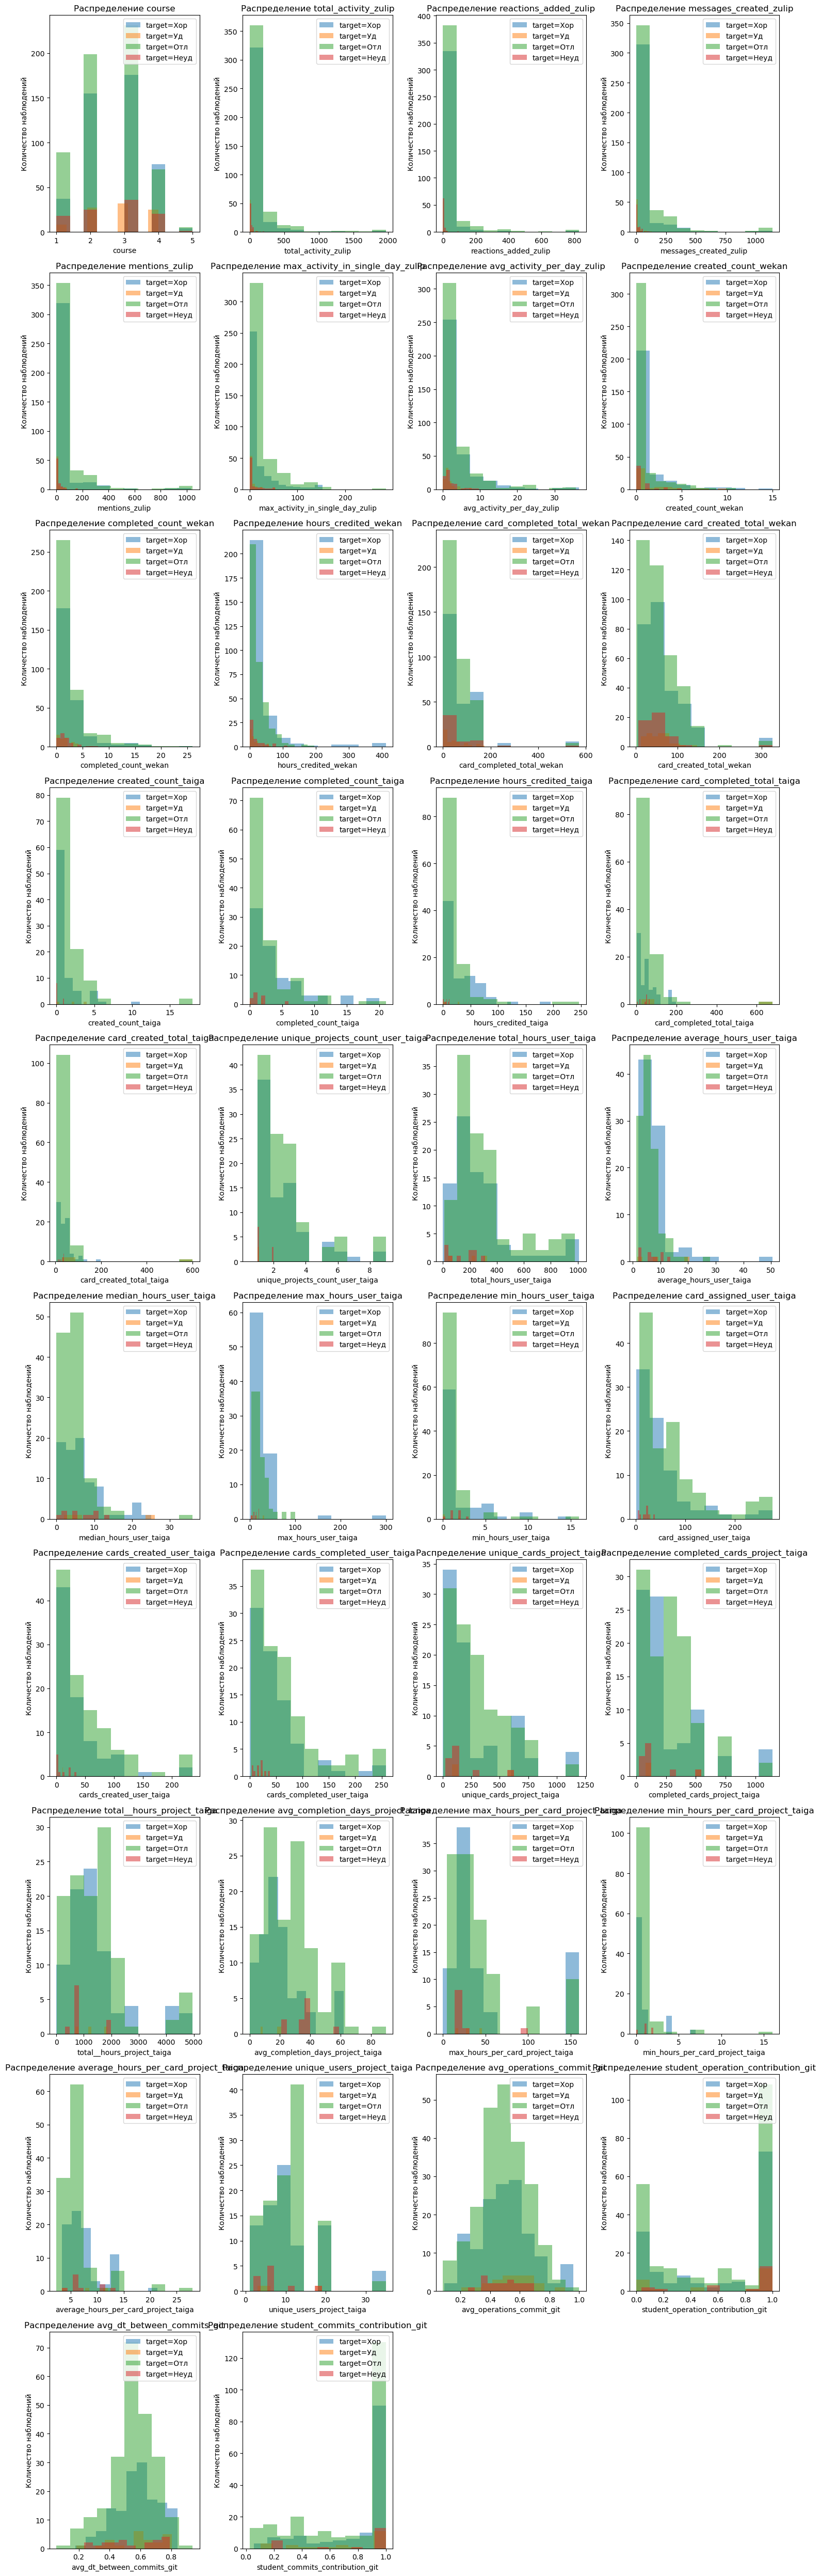

In [ ]:
numerical_cols = df_notna.select_dtypes(include=['number']).columns.tolist()
numerical_cols.remove('rate_total')
numerical_cols.remove('target')
numerical_cols.remove('person_id')
numerical_cols.remove('project_id')
num_cols = 4 
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols 
fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, param in enumerate(numerical_cols):
    row = i // num_cols
    col = i % num_cols

    if num_rows == 1:
        ax = axes[col]  
    else:
        ax = axes[row, col] 

    for t in df_notna['target_multiclass'].unique():
        ax.hist(df_notna[df_notna['target_multiclass'] == t][param], alpha=0.5, label=f'target={t}', bins=10)

    ax.set_xlabel(param)
    ax.set_ylabel('Количество наблюдений')
    ax.set_title(f'Распределение {param}')
    ax.legend(loc='upper right')

if len(numerical_cols) < num_rows * num_cols:
    for i in range(len(numerical_cols), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        if num_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        fig.delaxes(ax) 

plt.tight_layout()
plt.show()

In [ ]:
df_notna['year'].value_counts() / df_notna.shape[0] * 100

2022-2023    54.294976
2021-2022    45.705024
Name: year, dtype: float64

In [ ]:
df_notna['isna'].value_counts() / df_notna.shape[0] * 100

False    97.487844
True      2.512156
Name: isna, dtype: float64

In [ ]:
df_notna['stepen'].value_counts() / df_notna.shape[0] * 100


Б    78.768233
М    15.397083
С     5.834684
Name: stepen, dtype: float64

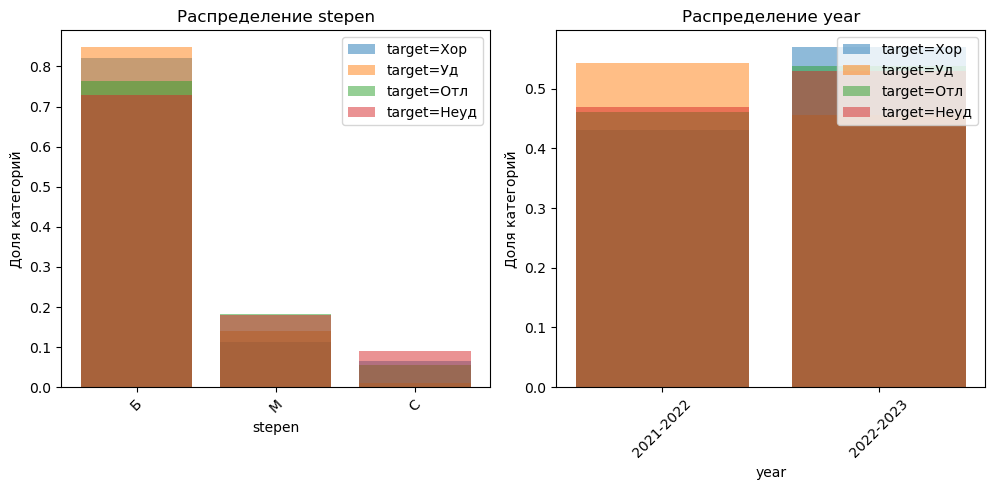

In [ ]:
categorical_cols = [
 'stepen',
 'year',
 ]

num_cols = 3
num_rows = (len(categorical_cols) + num_cols - 1) // num_cols  

fig, axes = plt.subplots(num_rows, num_cols, figsize=(15, 5 * num_rows))

for i, feature in enumerate(categorical_cols):
    row = i // num_cols
    col = i % num_cols

    if num_rows == 1:
        ax = axes[col]
    else:
        ax = axes[row, col]

    for target in df_notna['target_multiclass'].unique():
        subset = df_notna[df_notna['target_multiclass'] == target]
        counts = subset[feature].value_counts(normalize=True)
        counts.sort_index(inplace=True)
        ax.bar(counts.index, counts.values, alpha=0.5, label=f'target={target}')
        ax.tick_params(axis='x', rotation=45) 

    ax.set_xlabel(feature)
    ax.set_ylabel('Доля категорий')
    ax.set_title(f'Распределение {feature}')
    ax.legend(loc='upper right')

if len(categorical_cols) < num_rows * num_cols:
    for i in range(len(categorical_cols), num_rows * num_cols):
        row = i // num_cols
        col = i % num_cols
        if num_rows == 1:
            ax = axes[col]
        else:
            ax = axes[row, col]
        fig.delaxes(ax)  

plt.tight_layout()
plt.show()

In [ ]:
features = df_notna.select_dtypes(include=['number']).columns.tolist()
features.remove('person_id')
features.remove('project_id')
features.remove('target')
features.remove('rate_total')



target_values = df_notna['target_multiclass'].unique()

means = {}

for feature in features:
    means[feature] = {}
    for target in target_values:
        subset = df_notna[df_notna['target_multiclass'] == target][feature].dropna()
        if not subset.empty:
            means[feature][target] = subset.mean()
        else:
            means[feature][target] = np.nan

means_df = pd.DataFrame(means)

means_df.T[['Отл', 'Хор', 'Уд', 'Неуд']].round(1).to_csv('means_notna.csv', sep = ';')

# корреляция

rate_total                              1.000000
card_assigned_user_taiga                0.224795
cards_completed_user_taiga              0.216759
cards_created_user_taiga                0.212221
total_hours_user_taiga                  0.169431
messages_created_zulip                  0.148875
total_activity_zulip                    0.144066
max_activity_in_single_day_zulip        0.142495
mentions_zulip                          0.139116
avg_activity_per_day_zulip              0.134547
unique_users_project_taiga              0.130562
unique_projects_count_user_taiga        0.130401
unique_cards_project_taiga              0.129759
reactions_added_zulip                   0.129227
completed_cards_project_taiga           0.127287
total__hours_project_taiga              0.101068
created_count_taiga                     0.094201
completed_count_wekan                   0.066217
completed_count_taiga                   0.038033
avg_completion_days_project_taiga       0.035004
hours_credited_taiga

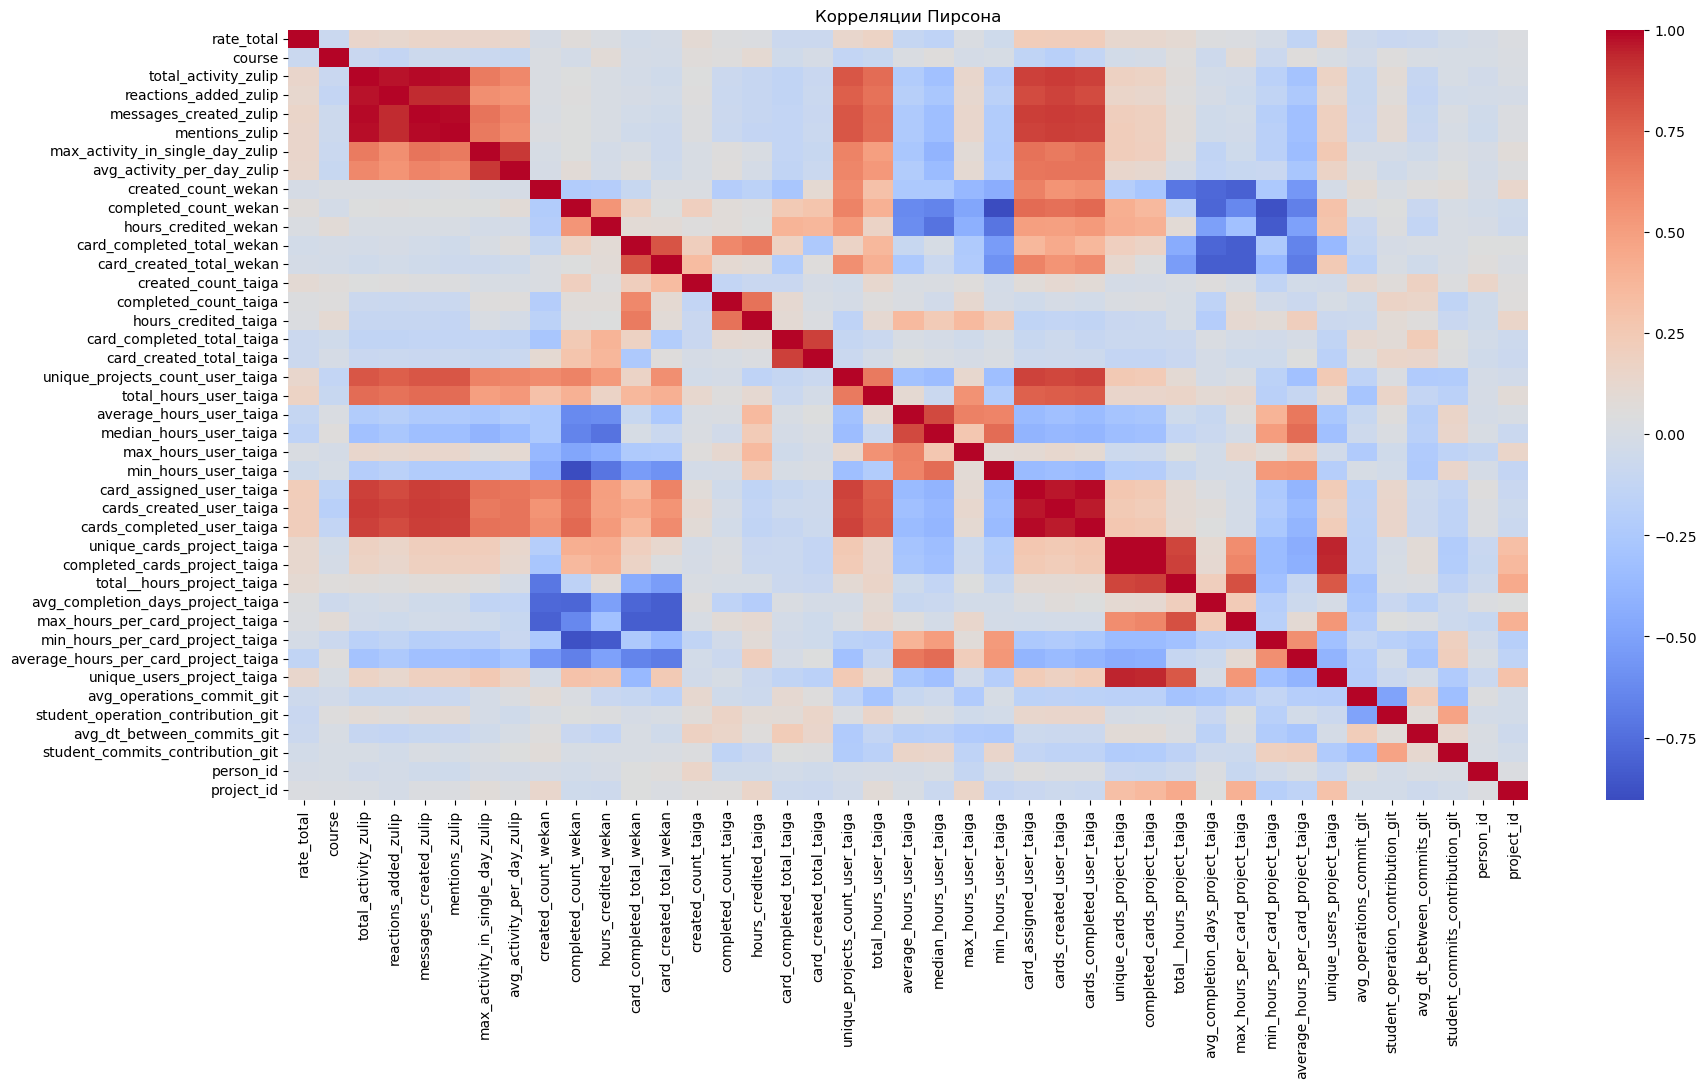

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df_notna.drop(columns = ['target', 'isna']).corr()['rate_total'].sort_values(ascending=False)
print(correlations)

plt.figure(figsize=(20, 10))
sns.heatmap((df_notna.drop(columns = ['target', 'isna'])).corr(), cmap='coolwarm', annot=False)
plt.title("Корреляции Пирсона")
plt.show()


# t-test

In [ ]:
# Это покажет числовые признаки, у которых средние значения сильно отличаются у классов target.
from scipy.stats import ttest_ind

significant_features = []

for col in df_notna.drop(columns = ['rate_total']).select_dtypes(include='number').columns:
    if col != 'target':
        group0 = df_notna[df_notna['target'] == 0][col].dropna()
        group1 = df_notna[df_notna['target'] == 1][col].dropna()
        if len(group0) > 5 and len(group1) > 5:
            stat, p = ttest_ind(group0, group1, equal_var=False)
            if p < 0.05:
                significant_features.append((col, p))

significant_features = sorted(significant_features, key=lambda x: x[1])
for col, p in significant_features:
    print(f"{col}: p = {round(p, 4)}")


messages_created_zulip: p = 0.0
total_activity_zulip: p = 0.0
mentions_zulip: p = 0.0
card_assigned_user_taiga: p = 0.0
reactions_added_zulip: p = 0.0
cards_completed_user_taiga: p = 0.0
avg_activity_per_day_zulip: p = 0.0
hours_credited_taiga: p = 0.0
max_activity_in_single_day_zulip: p = 0.0
cards_created_user_taiga: p = 0.0
unique_projects_count_user_taiga: p = 0.0
created_count_taiga: p = 0.0
max_hours_user_taiga: p = 0.0003
project_id: p = 0.0021
total_hours_user_taiga: p = 0.0035
avg_completion_days_project_taiga: p = 0.0051
total__hours_project_taiga: p = 0.0094
created_count_wekan: p = 0.0127
completed_count_wekan: p = 0.0174
card_created_total_taiga: p = 0.0234
student_operation_contribution_git: p = 0.0297
completed_count_taiga: p = 0.038
unique_users_project_taiga: p = 0.0385
max_hours_per_card_project_taiga: p = 0.0396
completed_cards_project_taiga: p = 0.041
unique_cards_project_taiga: p = 0.0467


# mann-whitney


In [ ]:
taiga_cols = ['created_count_taiga', 'completed_count_taiga', 'hours_credited_taiga',
       'card_completed_total_taiga', 'card_created_total_taiga',
       'unique_projects_count_user_taiga', 'total_hours_user_taiga',
       'average_hours_user_taiga', 'median_hours_user_taiga',
       'max_hours_user_taiga', 'min_hours_user_taiga',
       'card_assigned_user_taiga', 'cards_created_user_taiga',
       'cards_completed_user_taiga', 'unique_cards_project_taiga',
       'completed_cards_project_taiga', 'total__hours_project_taiga',
       'avg_completion_days_project_taiga', 'max_hours_per_card_project_taiga',
       'min_hours_per_card_project_taiga',
       'average_hours_per_card_project_taiga', 'unique_users_project_taiga'],

In [ ]:
df_taiga_notna = df[~df[df.columns[df.columns.str.endswith('wekan')]].isna().all(axis=1)]


In [ ]:
from scipy.stats import mannwhitneyu


for col in df.drop(columns = ['rate_total', 'target', 'isna']).select_dtypes(include='number').columns:

    u_stat, p_value = mannwhitneyu(df[df['target'] == 1][col],
                                df[df['target'] == 0][col],
                                alternative='two-sided')
    print(f"{col}: p = {p_value}")

In [ ]:
from scipy.stats import mannwhitneyu


for col in df_taiga_notna.drop(columns = ['rate_total', 'target', 'isna']).select_dtypes(include='number').columns:

    u_stat, p_value = mannwhitneyu(df_taiga_notna[df_taiga_notna['target'] == 1][col],
                                df_taiga_notna[df_taiga_notna['target'] == 0][col],
                                alternative='two-sided')
    print(f"{col}: p = {p_value}")


course: p = 0.6530357276854519
total_activity_zulip: p = nan
reactions_added_zulip: p = nan
messages_created_zulip: p = nan
mentions_zulip: p = nan
messages_updated_zulip: p = nan
reactions_removed_zulip: p = nan
max_activity_in_single_day_zulip: p = nan
avg_activity_per_day_zulip: p = nan
created_count_wekan: p = 0.04770121228587682
completed_count_wekan: p = 0.6229066657469433
hours_credited_wekan: p = 0.8532701770877273
card_completed_total_wekan: p = 0.3906129165813922
card_created_total_wekan: p = 0.5279500203073448
created_count_taiga: p = nan
completed_count_taiga: p = nan
hours_credited_taiga: p = nan
card_completed_total_taiga: p = nan
card_created_total_taiga: p = nan
unique_projects_count_user_taiga: p = nan
total_hours_user_taiga: p = nan
average_hours_user_taiga: p = nan
median_hours_user_taiga: p = nan
max_hours_user_taiga: p = nan
min_hours_user_taiga: p = nan
card_assigned_user_taiga: p = nan
cards_created_user_taiga: p = nan
cards_completed_user_taiga: p = nan
unique_c

<Axes: xlabel='target', ylabel='avg_activity_per_day_zulip'>

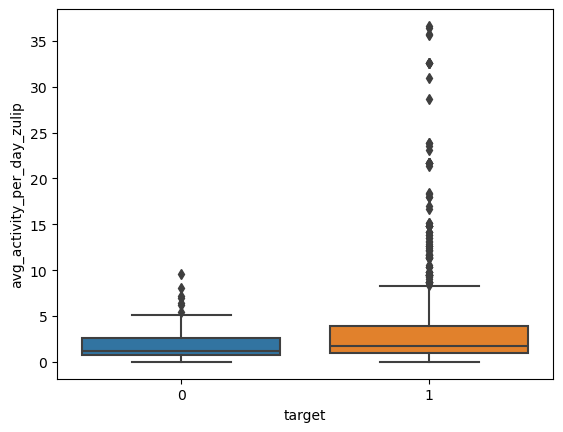

In [ ]:
sns.boxplot(data=df.drop(columns = ['rate_total']), x='target', y='avg_activity_per_day_zulip')


# Распределения признаков

array([[<Axes: title={'center': 'target'}>,
        <Axes: title={'center': 'course'}>,
        <Axes: title={'center': 'rate_total'}>,
        <Axes: title={'center': 'total_activity_zulip'}>,
        <Axes: title={'center': 'reactions_added_zulip'}>,
        <Axes: title={'center': 'messages_created_zulip'}>,
        <Axes: title={'center': 'mentions_zulip'}>],
       [<Axes: title={'center': 'messages_updated_zulip'}>,
        <Axes: title={'center': 'reactions_removed_zulip'}>,
        <Axes: title={'center': 'max_activity_in_single_day_zulip'}>,
        <Axes: title={'center': 'avg_activity_per_day_zulip'}>,
        <Axes: title={'center': 'created_count_wekan'}>,
        <Axes: title={'center': 'completed_count_wekan'}>,
        <Axes: title={'center': 'hours_credited_wekan'}>],
       [<Axes: title={'center': 'card_completed_total_wekan'}>,
        <Axes: title={'center': 'card_created_total_wekan'}>,
        <Axes: title={'center': 'created_count_taiga'}>,
        <Axes: title=

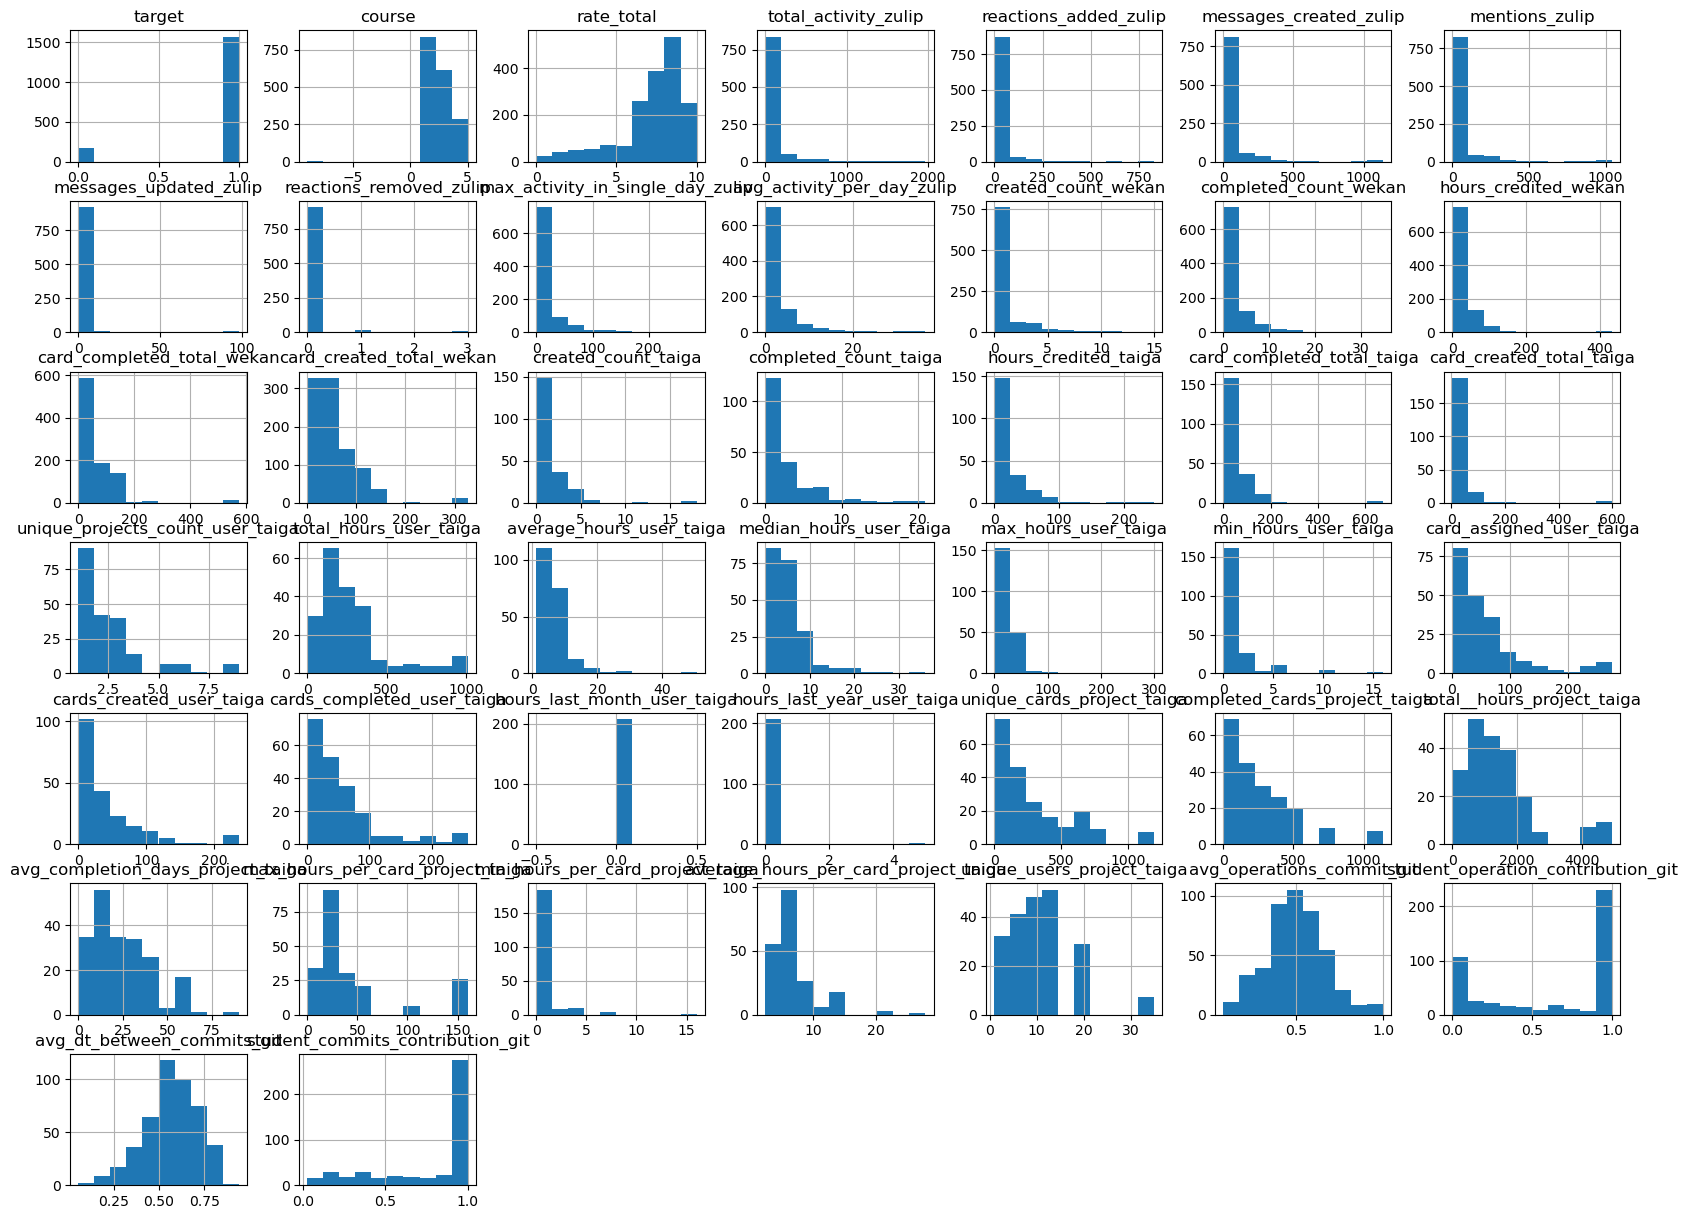

In [ ]:
df.hist(figsize=(20,15))

array([[<Axes: title={'center': 'mentions_zulip'}>,
        <Axes: title={'center': 'messages_created_zulip'}>,
        <Axes: title={'center': 'max_activity_in_single_day_zulip'}>,
        <Axes: title={'center': 'avg_activity_per_day_zulip'}>],
       [<Axes: title={'center': 'max_hours_user_taiga'}>,
        <Axes: title={'center': 'created_count_taiga'}>,
        <Axes: title={'center': 'student_operation_contribution_git'}>,
        <Axes: title={'center': 'hours_credited_taiga'}>],
       [<Axes: title={'center': 'max_hours_per_card_project_taiga'}>,
        <Axes: title={'center': 'completed_cards_project_taiga'}>,
        <Axes: title={'center': 'unique_cards_project_taiga'}>,
        <Axes: title={'center': 'total__hours_project_taiga'}>],
       [<Axes: title={'center': 'unique_users_project_taiga'}>,
        <Axes: title={'center': 'total_hours_user_taiga'}>,
        <Axes: title={'center': 'unique_projects_count_user_taiga'}>,
        <Axes: title={'center': 'cards_created_

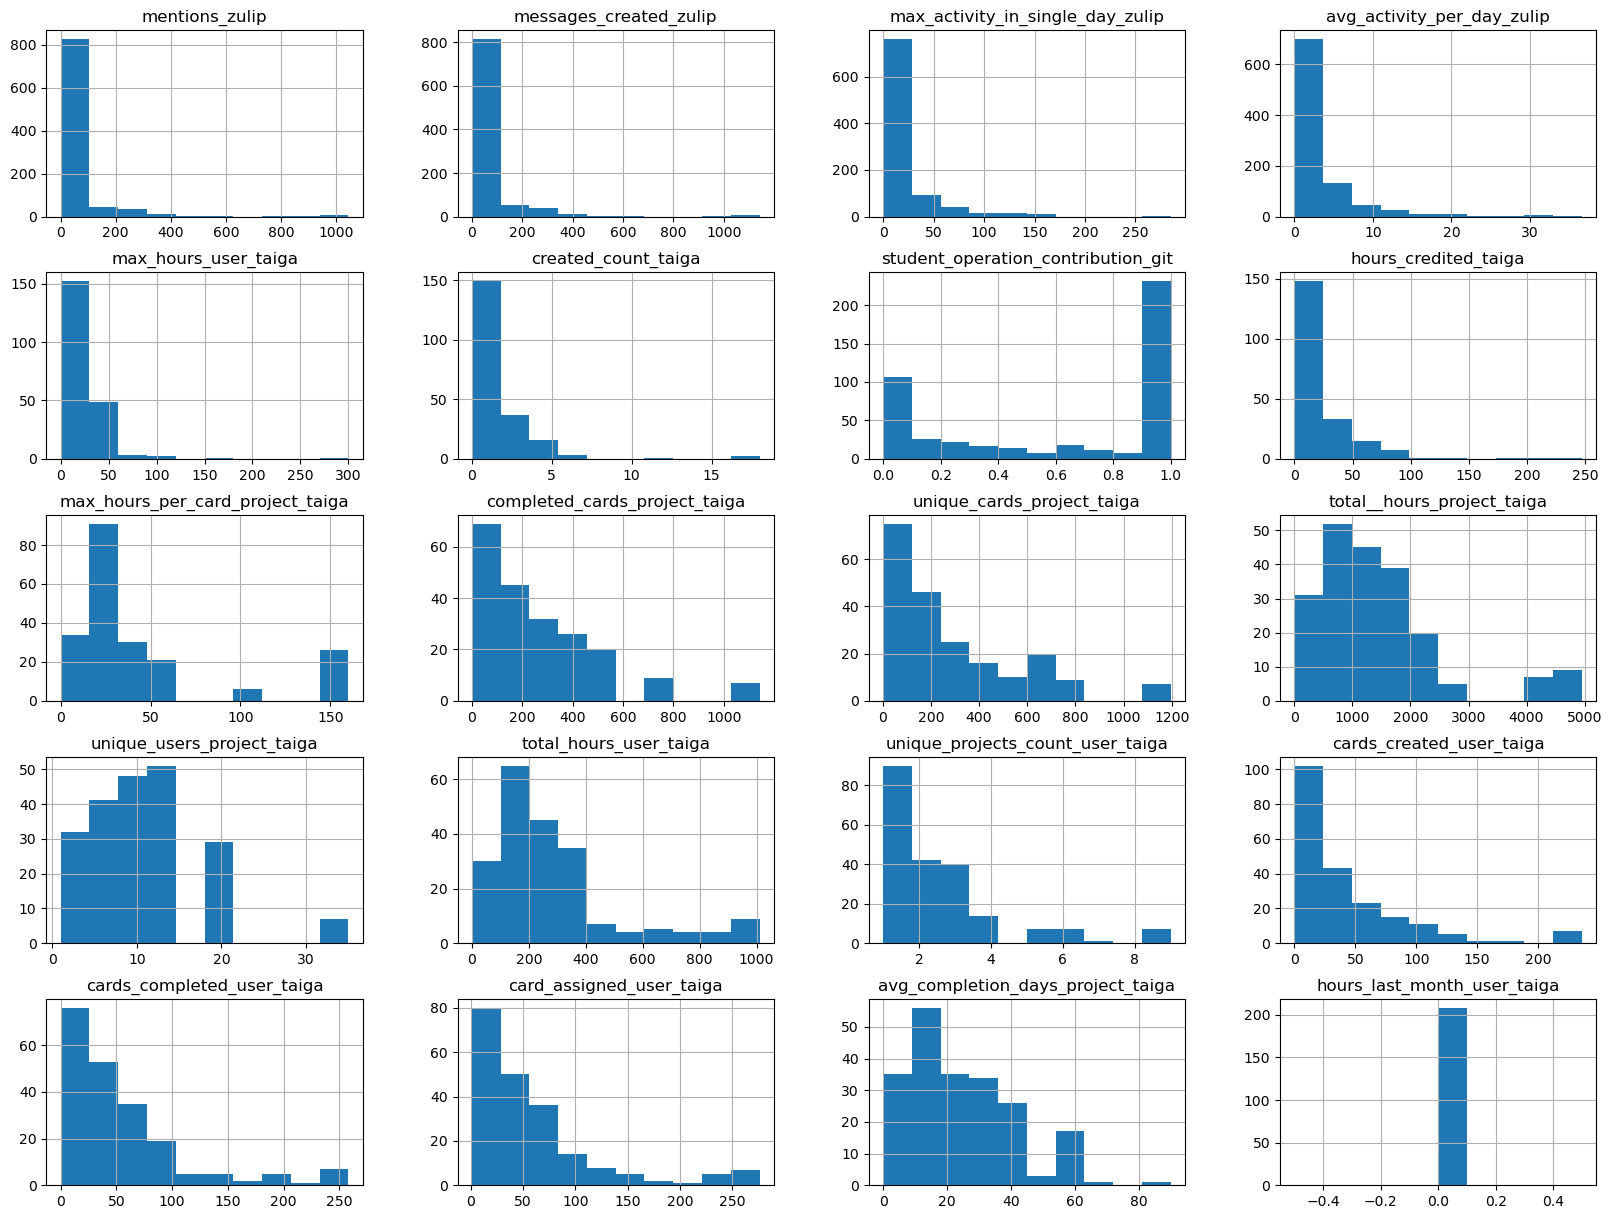

In [ ]:
df[np.abs(correlations).sort_values()[-20:].index.values].hist(figsize=(20,15))

<Axes: xlabel='rate_total', ylabel='Density'>

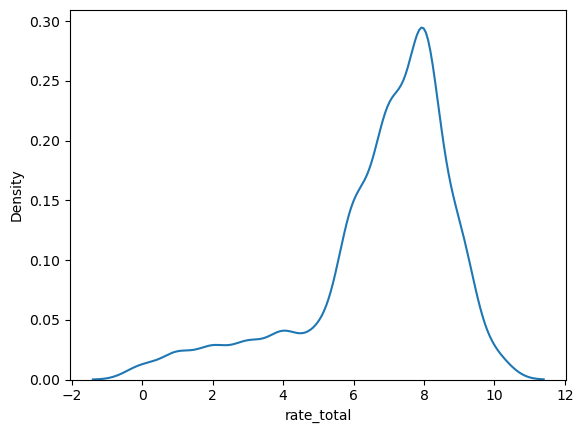

In [ ]:
sns.kdeplot(df['rate_total'].dropna())

In [ ]:
sorted(df_notna.columns)

['average_hours_per_card_project_taiga',
 'average_hours_user_taiga',
 'avg_activity_per_day_zulip',
 'avg_completion_days_project_taiga',
 'avg_dt_between_commits_git',
 'avg_operations_commit_git',
 'card_assigned_user_taiga',
 'card_completed_total_taiga',
 'card_completed_total_wekan',
 'card_created_total_taiga',
 'card_created_total_wekan',
 'cards_completed_user_taiga',
 'cards_created_user_taiga',
 'completed_cards_project_taiga',
 'completed_count_taiga',
 'completed_count_wekan',
 'course',
 'created_count_taiga',
 'created_count_wekan',
 'hours_credited_taiga',
 'hours_credited_wekan',
 'isna',
 'max_activity_in_single_day_zulip',
 'max_hours_per_card_project_taiga',
 'max_hours_user_taiga',
 'median_hours_user_taiga',
 'mentions_zulip',
 'messages_created_zulip',
 'min_hours_per_card_project_taiga',
 'min_hours_user_taiga',
 'person_id',
 'project_head',
 'project_id',
 'rate_total',
 'reactions_added_zulip',
 'stepen',
 'student_commits_contribution_git',
 'student_group',

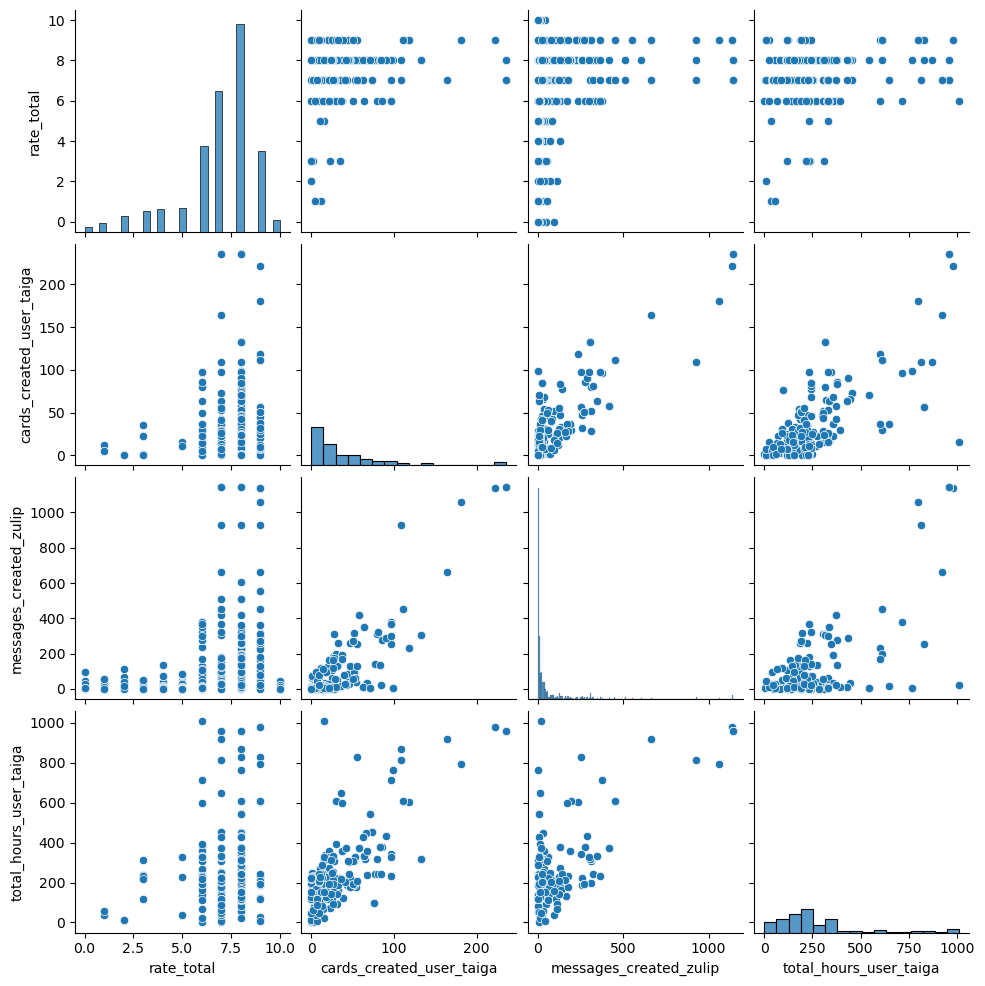

In [ ]:
sns.pairplot(df_notna[['rate_total', 'cards_created_user_taiga', 'messages_created_zulip', 'total_hours_user_taiga']])


<Axes: >

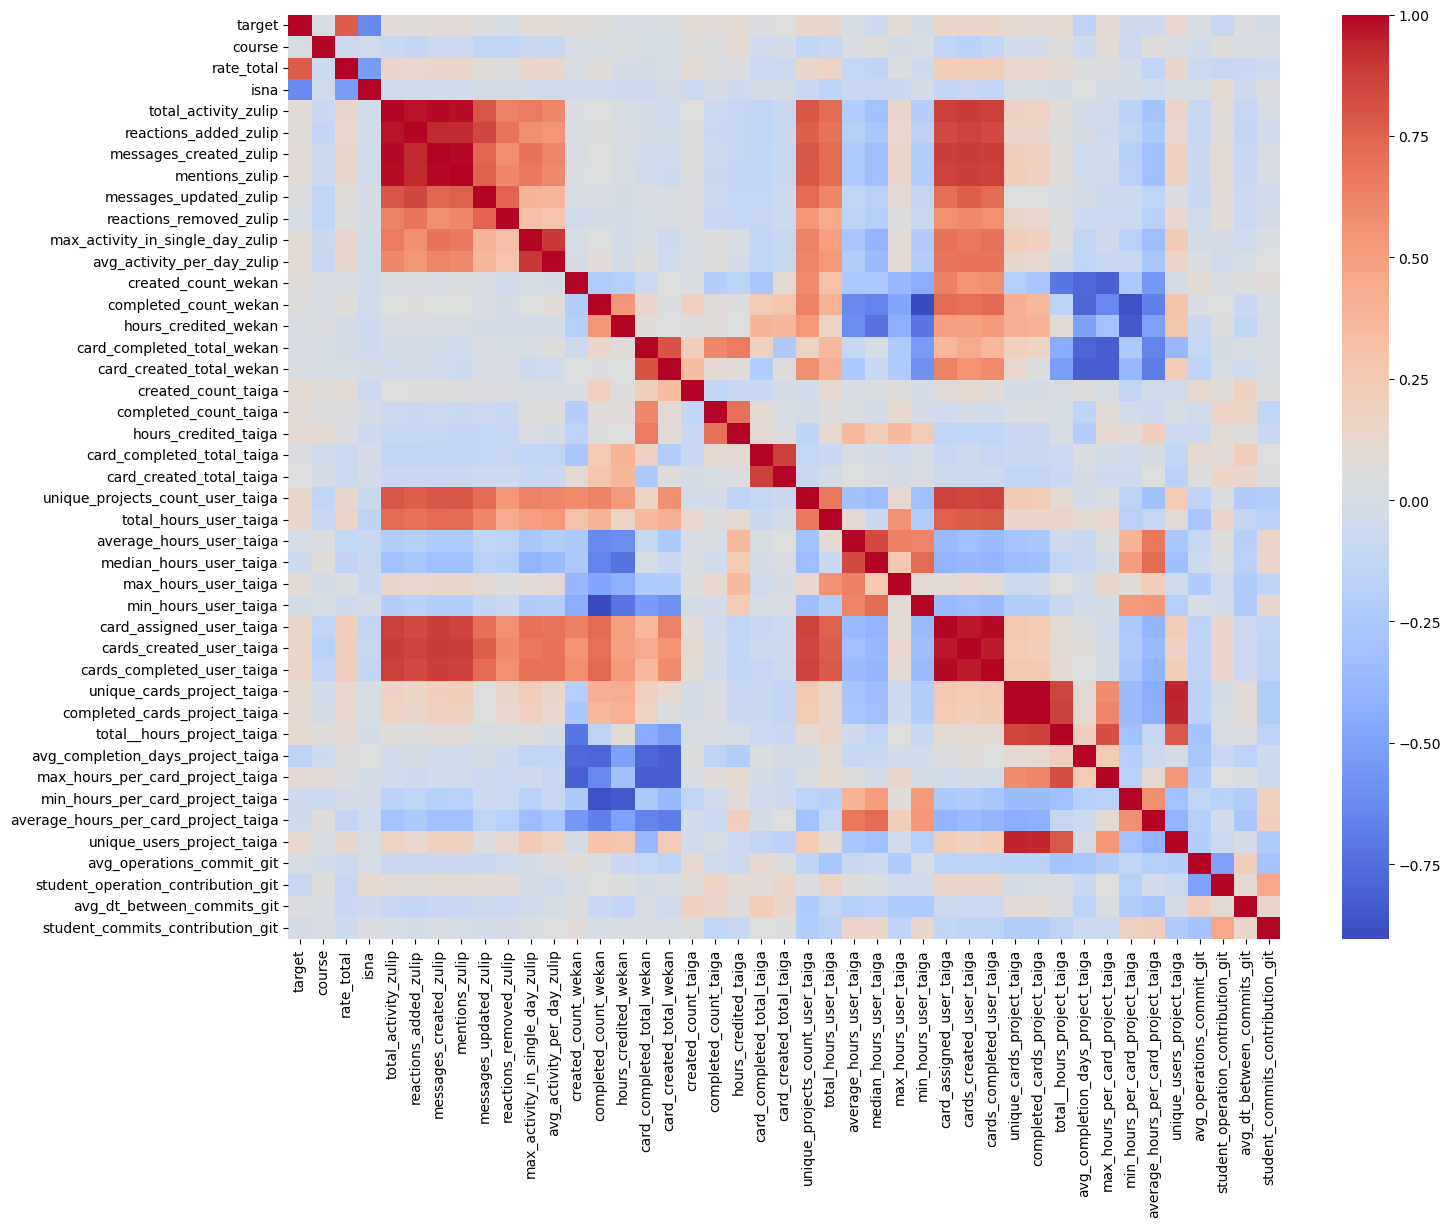

In [ ]:
plt.figure(figsize=(16,12))
sns.heatmap(df.corr(), cmap='coolwarm', annot=False)


# shapiro


In [ ]:
from scipy.stats import shapiro
stat, p = shapiro(df['rate_total'].dropna())
print(f'p-value: {p}')
print('not normal' if (p < .05) else 'normal')


p-value: 6.003947348307538e-37
not normal


In [ ]:
top_featuers = np.abs(correlations).sort_values()[-20:].index.values

In [ ]:
for col in top_featuers:
    print('\n', col)
    stat, p = shapiro(df[col].dropna())
    print(f'p-value: {p}')
    print('not normal' if (p < .05) else 'normal')


 mentions_zulip
p-value: 0.0
not normal

 messages_created_zulip
p-value: 0.0
not normal

 max_activity_in_single_day_zulip
p-value: 5.118943290178557e-42
not normal

 avg_activity_per_day_zulip
p-value: 3.514456548526641e-42
not normal

 max_hours_user_taiga
p-value: 4.079188302414726e-24
not normal

 created_count_taiga
p-value: 8.896311332136474e-23
not normal

 student_operation_contribution_git
p-value: 1.009197767917809e-25
not normal

 hours_credited_taiga
p-value: 6.3094206925473034e-21
not normal

 max_hours_per_card_project_taiga
p-value: 2.0746651360292027e-19
not normal

 completed_cards_project_taiga
p-value: 4.4478466625140576e-15
not normal

 unique_cards_project_taiga
p-value: 1.4813806648375505e-14
not normal

 total__hours_project_taiga
p-value: 7.163122159770281e-15
not normal

 unique_users_project_taiga
p-value: 3.0511997008847436e-12
not normal

 total_hours_user_taiga
p-value: 3.5299666090019867e-15
not normal

 unique_projects_count_user_taiga
p-value: 1.083384

d:\programs\anaconda3\conda\lib\site-packages\scipy\stats\_morestats.py:1879: UserWarning: Input data for shapiro has range zero. The results may not be accurate.
  warnings.warn("Input data for shapiro has range zero. The results "


# Корреляции пирсона и спирмена

card_assigned_user_taiga                0.224795
cards_completed_user_taiga              0.216759
cards_created_user_taiga                0.212221
total_hours_user_taiga                  0.169431
messages_created_zulip                  0.148389
total_activity_zulip                    0.143686
max_activity_in_single_day_zulip        0.141389
mentions_zulip                          0.138564
avg_activity_per_day_zulip              0.133452
unique_users_project_taiga              0.130562
unique_projects_count_user_taiga        0.130401
unique_cards_project_taiga              0.129759
reactions_added_zulip                   0.129044
completed_cards_project_taiga           0.127287
total__hours_project_taiga              0.101068
created_count_taiga                     0.094201
completed_count_wekan                   0.069635
messages_updated_zulip                  0.064233
reactions_removed_zulip                 0.050053
completed_count_taiga                   0.038033
avg_completion_days_

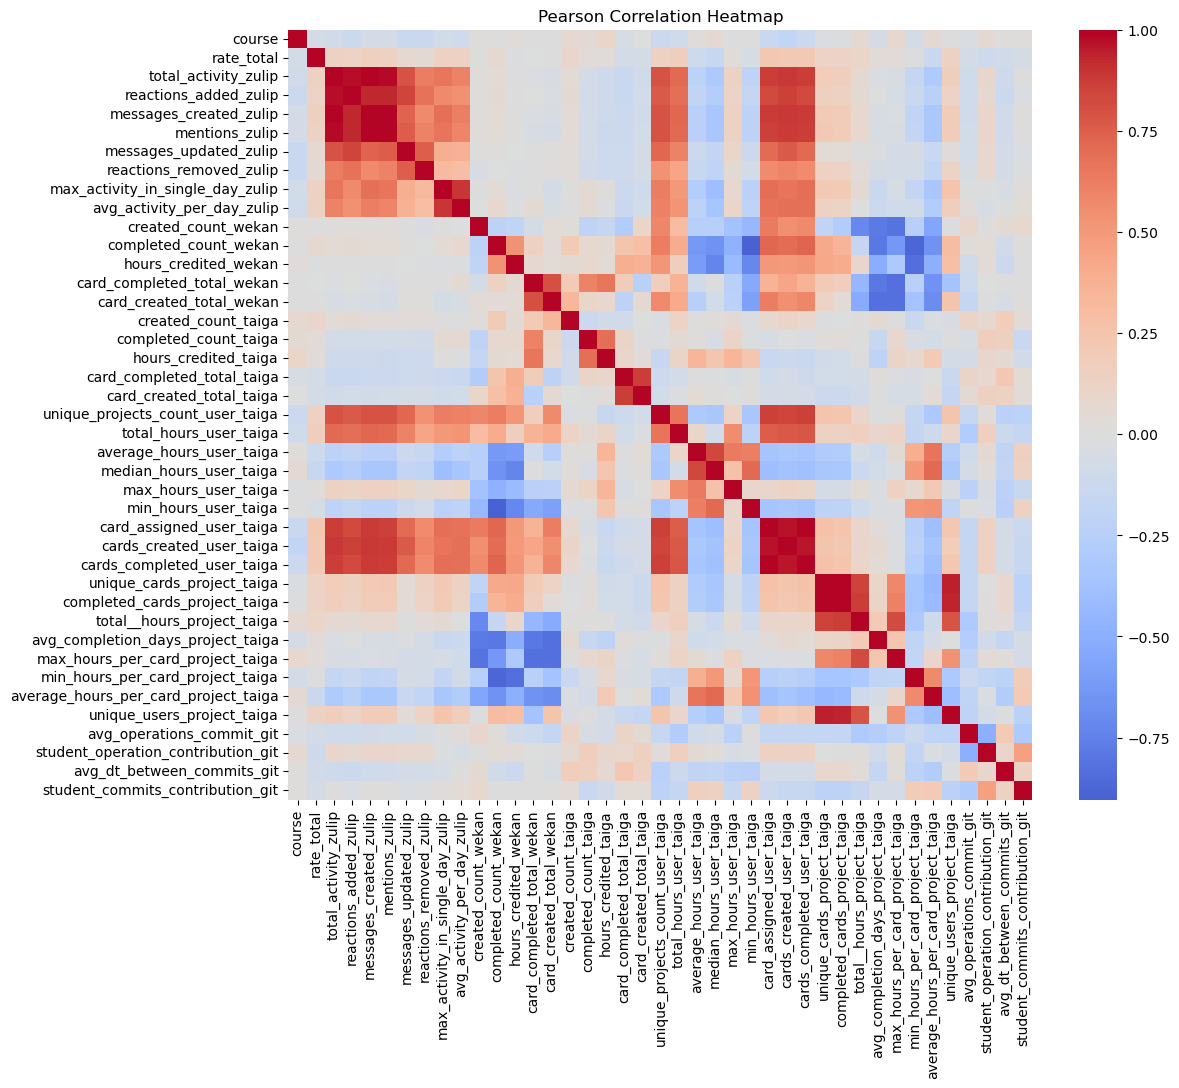

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df.drop(columns = ['target', 'isna']).corr(method='pearson')['rate_total'].drop('rate_total').sort_values(ascending=False)
print(correlations)

corr = df.drop(columns = ['target', 'isna']).corr(method='pearson')
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Pearson Correlation Heatmap")
plt.show()


card_assigned_user_taiga                0.267188
cards_completed_user_taiga              0.247086
cards_created_user_taiga                0.242734
unique_cards_project_taiga              0.189056
completed_cards_project_taiga           0.177227
unique_users_project_taiga              0.173631
reactions_added_zulip                   0.163819
total_activity_zulip                    0.160053
messages_created_zulip                  0.158594
max_activity_in_single_day_zulip        0.149682
avg_completion_days_project_taiga       0.144070
avg_activity_per_day_zulip              0.142848
total_hours_user_taiga                  0.133024
mentions_zulip                          0.132895
unique_projects_count_user_taiga        0.118485
created_count_taiga                     0.113994
messages_updated_zulip                  0.101564
total__hours_project_taiga              0.076530
reactions_removed_zulip                 0.056787
hours_credited_wekan                    0.029225
max_hours_user_taiga

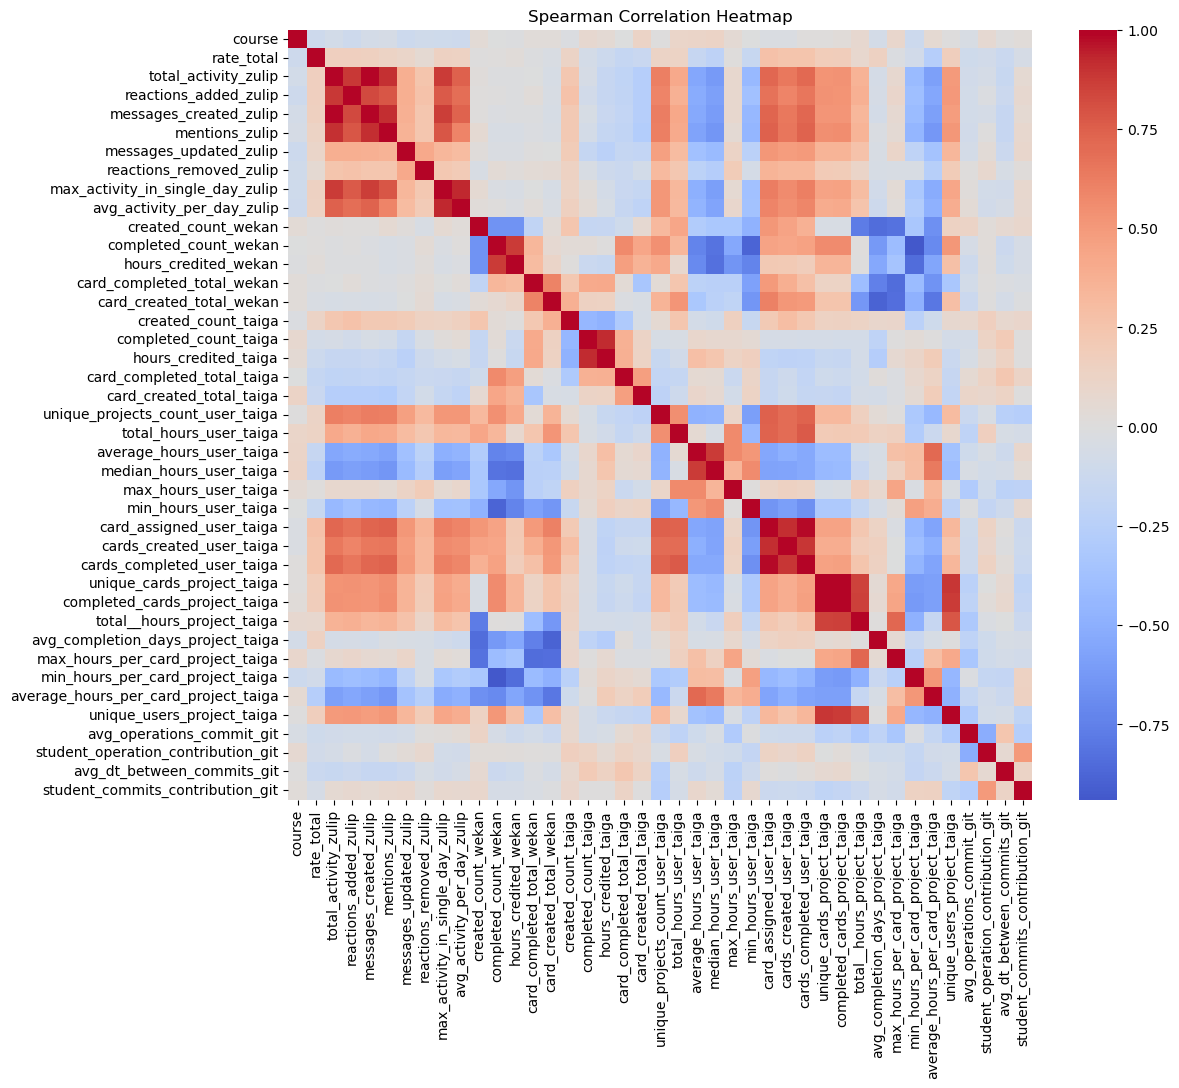

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

correlations = df.drop(columns = ['target', 'isna']).corr(method='spearman')['rate_total'].drop('rate_total').sort_values(ascending=False)
print(correlations)

corr = df.drop(columns = ['target', 'isna']).corr(method='spearman')
plt.figure(figsize=(12,10))
sns.heatmap(corr, cmap='coolwarm', center=0, annot=False)
plt.title("Spearman Correlation Heatmap")
plt.show()


# Групповой анализ (kruskal wallis)

In [ ]:
from scipy.stats import kruskal

groups = [df_notna[df_notna['stepen'] == c]['target'].dropna() for c in df_notna['stepen'].unique()]
kruskal(*groups)


KruskalResult(statistic=2.8048296212075883, pvalue=0.24600219739152518)

In [ ]:
for target in ['rate_total', 'target', 'target_multiclass']:
    print('\n', target)
    for col in ['stepen', 'course', 'year']:
        print(col, end=':')
        groups = [df_notna[df_notna[col] == c][target].dropna() for c in df_notna[col].unique()]
        print(kruskal(*groups))



 rate_total
stepen:KruskalResult(statistic=9.191231216719109, pvalue=0.010096003683261004)
course:KruskalResult(statistic=19.725422803637624, pvalue=0.0005657402825641971)
year:KruskalResult(statistic=0.14978259160268959, pvalue=0.6987432081572525)

 target
stepen:KruskalResult(statistic=2.8048296212075883, pvalue=0.24600219739152518)
course:KruskalResult(statistic=6.57343109331089, pvalue=0.1602220339117338)
year:KruskalResult(statistic=0.07347670378429032, pvalue=0.7863403739296473)

 target_multiclass
stepen:KruskalResult(statistic=9.2613916615502, pvalue=0.009747973801740077)
course:KruskalResult(statistic=15.425236257182355, pvalue=0.0038958406534448744)
year:KruskalResult(statistic=0.744297989575322, pvalue=0.38828754772884)


In [ ]:
df_notna['course'].unique()

array([4., 1., 3., 2., 5.])

In [ ]:
df_notna = df_notna.drop(columns = 'year')

# выбросы

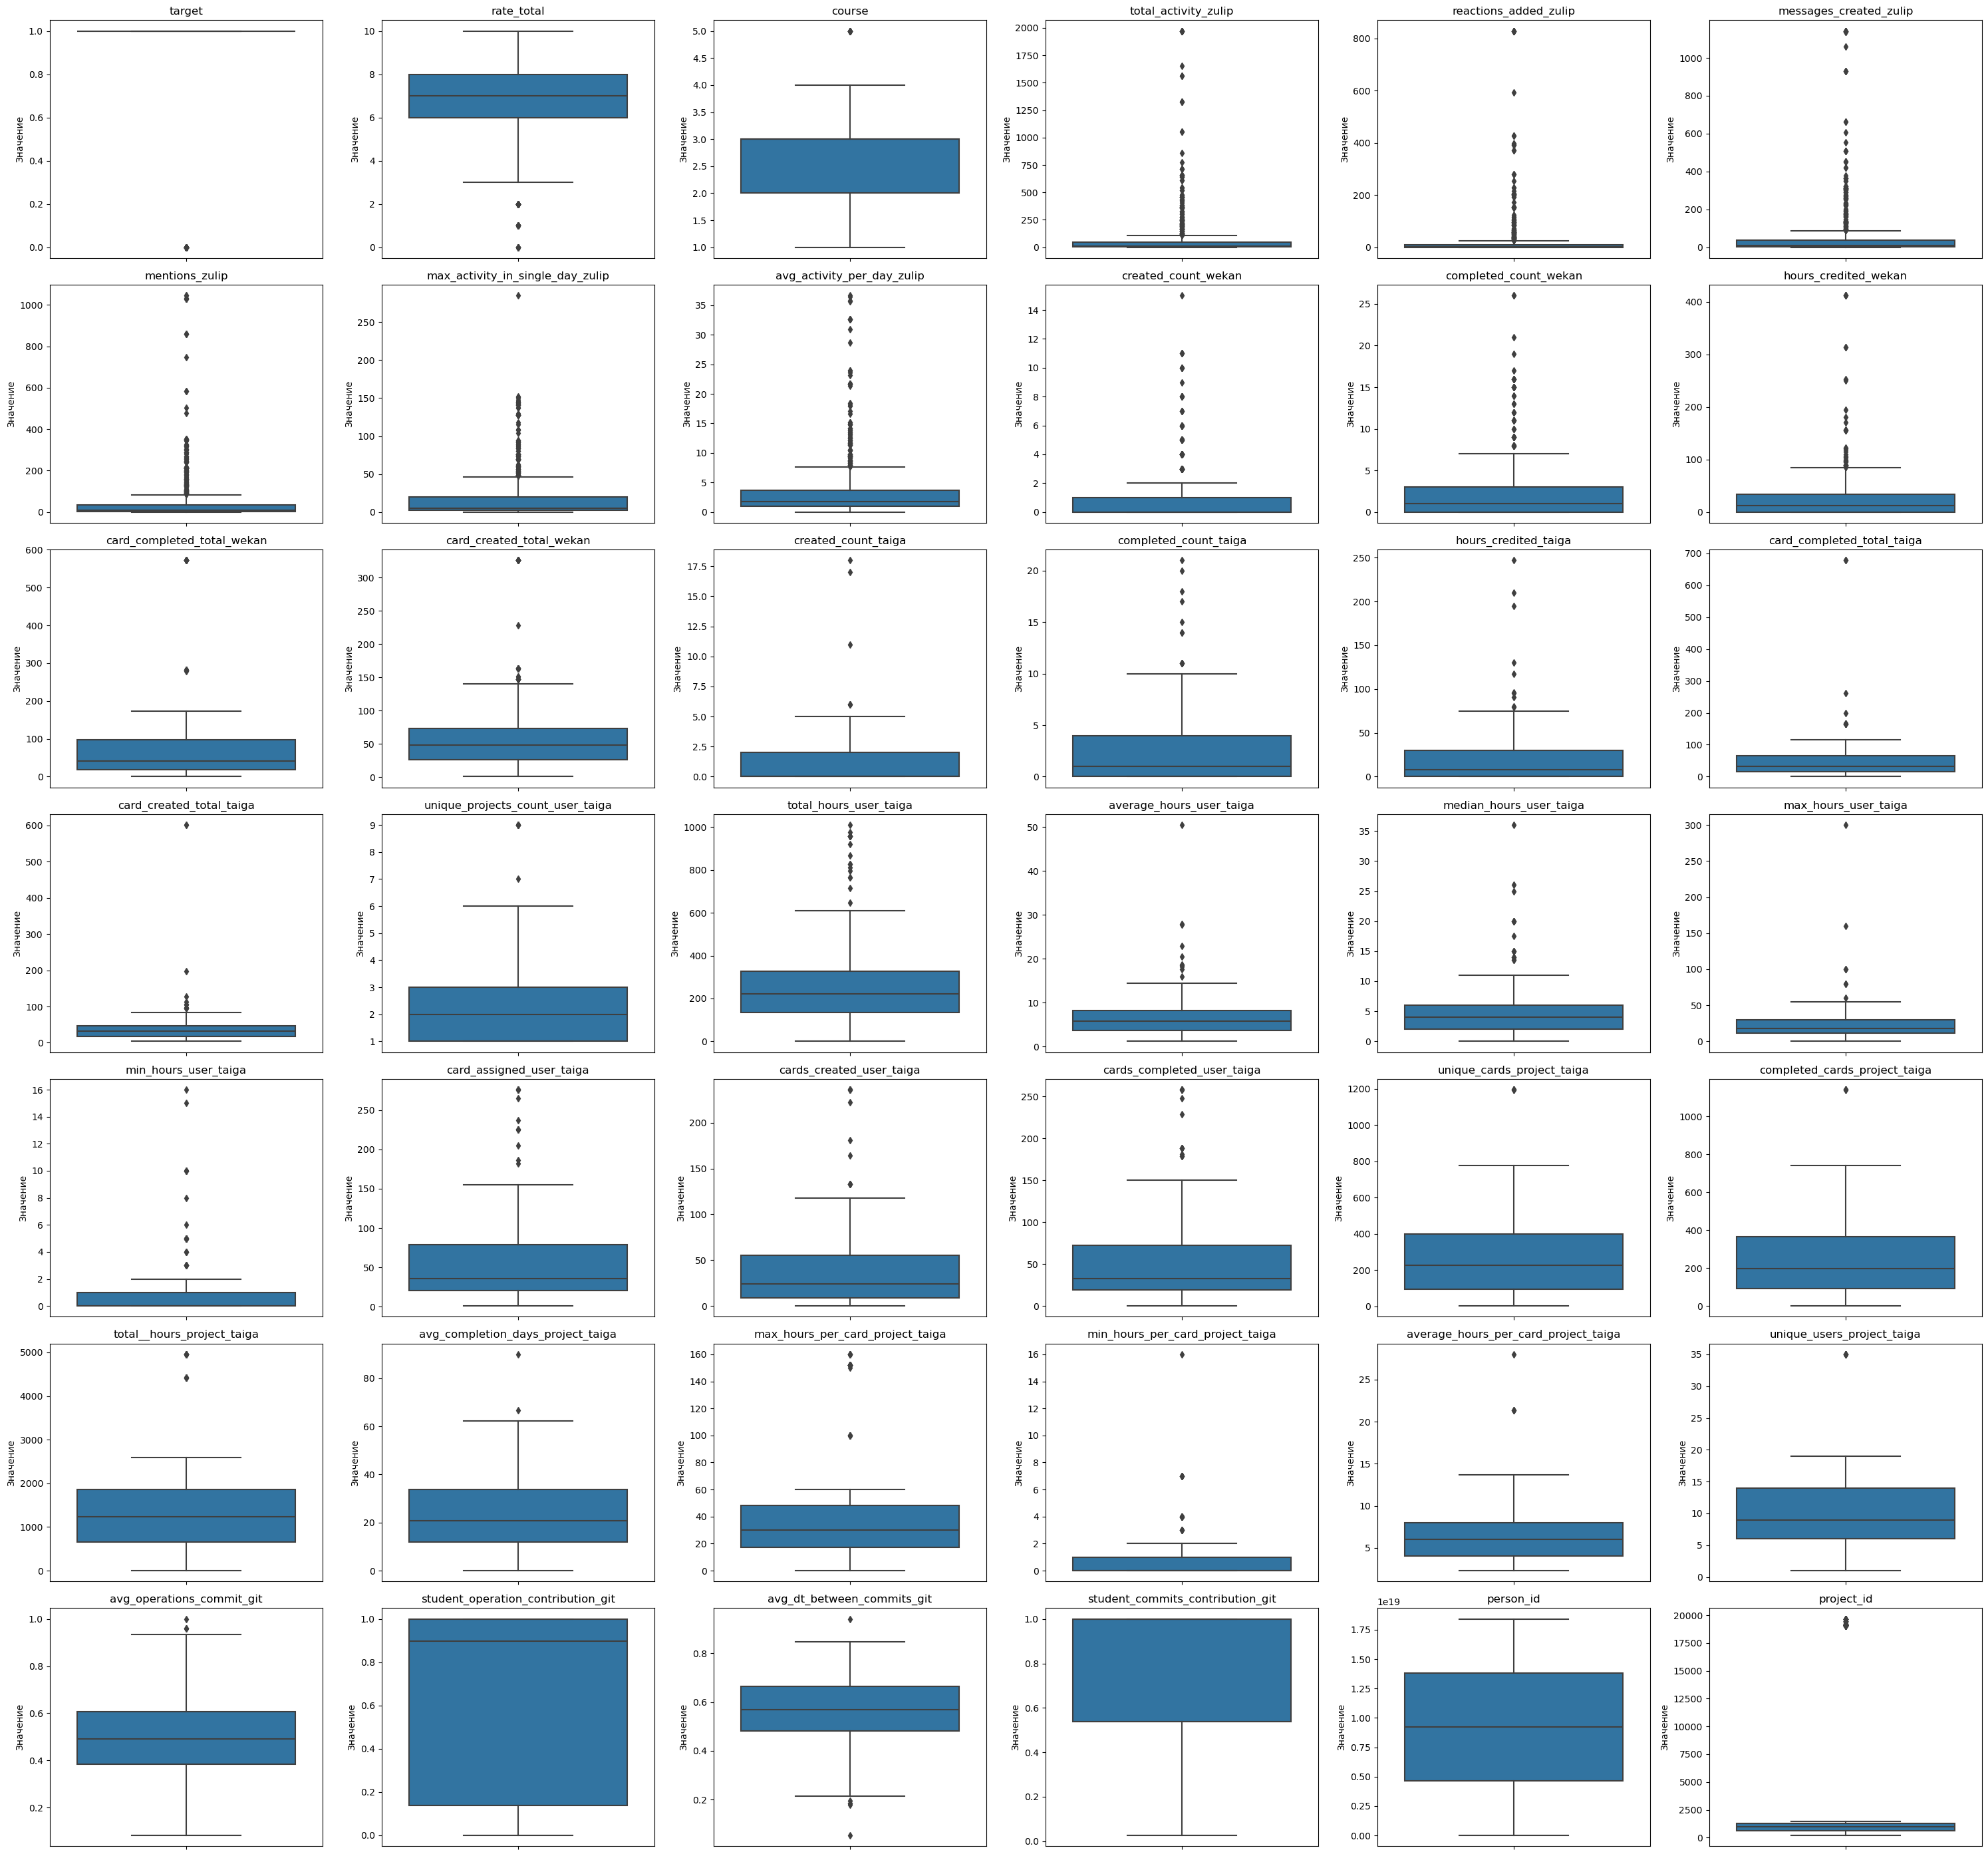

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

numerical_cols = df_notna.select_dtypes(include=['number']).columns

num_cols = 6 
num_rows = (len(numerical_cols) + num_cols - 1) // num_cols

fig, axes = plt.subplots(num_rows, num_cols, figsize=(30, 4 * num_rows))
axes = np.array(axes).reshape(-1, num_cols) 

for i, col in enumerate(numerical_cols):
    row = i // num_cols
    col_num = i % num_cols
    ax = axes[row, col_num]

    sns.boxplot(y=df_notna[col], ax=ax)
    ax.set_title(col)
    ax.set_ylabel("Значение")

for j in range(len(numerical_cols), num_rows * num_cols):
    fig.delaxes(axes[j // num_cols, j % num_cols])

plt.tight_layout()
plt.show()


# pca test

In [ ]:
missing_percent = df_notna[numerical_cols].isna().mean().sort_values(ascending=False)
print(missing_percent[missing_percent > 0])


average_hours_user_taiga                0.833063
average_hours_per_card_project_taiga    0.833063
unique_cards_project_taiga              0.832253
median_hours_user_taiga                 0.832253
max_hours_user_taiga                    0.832253
min_hours_user_taiga                    0.832253
card_assigned_user_taiga                0.832253
cards_created_user_taiga                0.832253
cards_completed_user_taiga              0.832253
completed_cards_project_taiga           0.832253
card_created_total_taiga                0.832253
total__hours_project_taiga              0.832253
avg_completion_days_project_taiga       0.832253
max_hours_per_card_project_taiga        0.832253
min_hours_per_card_project_taiga        0.832253
unique_users_project_taiga              0.832253
total_hours_user_taiga                  0.832253
unique_projects_count_user_taiga        0.832253
card_completed_total_taiga              0.832253
hours_credited_taiga                    0.832253
completed_count_taig

In [ ]:
good_cols = missing_percent[missing_percent < 0.8].index
X = df_notna[good_cols].dropna()


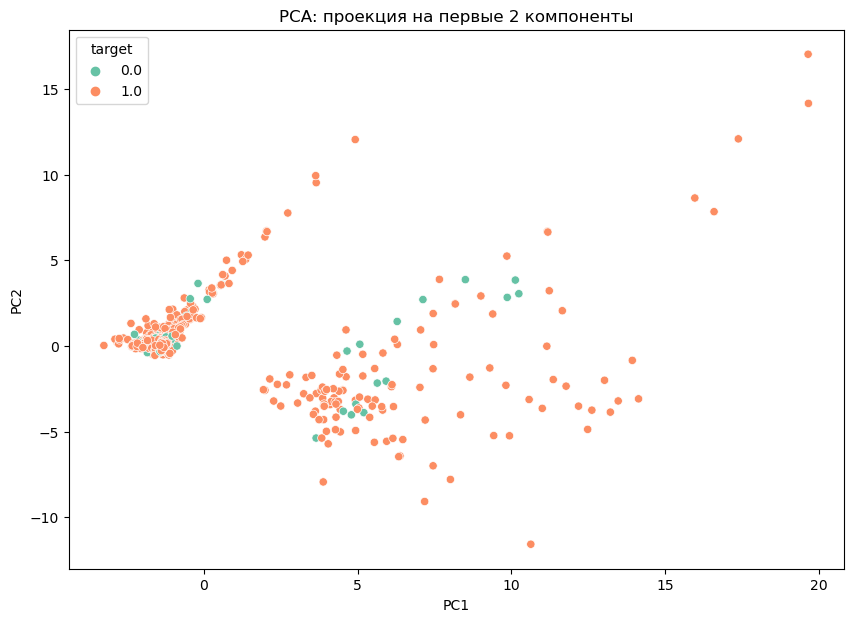

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
import seaborn as sns

X = df_notna[numerical_cols].fillna(0)

X_scaled = StandardScaler().fit_transform(X)

pca = PCA(n_components=2) 
X_pca = pca.fit_transform(X_scaled)

pca_df = pd.DataFrame(data=X_pca, columns=['PC1', 'PC2'])
pca_df['target'] = df_notna['target'] 

plt.figure(figsize=(10,7))
sns.scatterplot(data=pca_df, x='PC1', y='PC2', hue='target', palette='Set2')
plt.title('PCA: проекция на первые 2 компоненты')
plt.show()


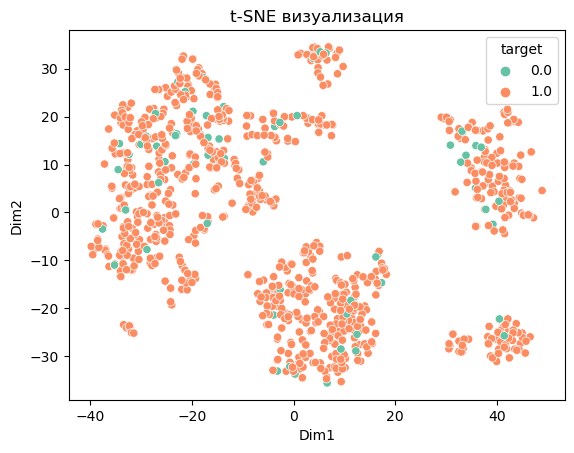

In [ ]:
from sklearn.manifold import TSNE


X = df_notna[numerical_cols].fillna(0)

X_scaled = StandardScaler().fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['target'] = df_notna['target']

sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='target', palette='Set2')
plt.title('t-SNE визуализация')
plt.show()


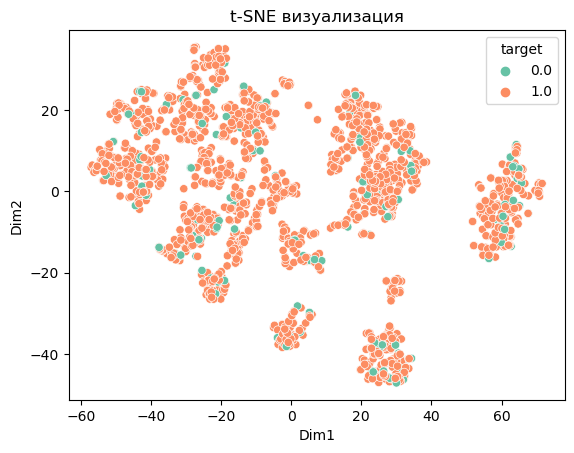

In [ ]:
from sklearn.manifold import TSNE

X = df[numerical_cols].fillna(0)

X_scaled = StandardScaler().fit_transform(X)
X_tsne = TSNE(n_components=2, perplexity=30, random_state=42).fit_transform(X_scaled)

tsne_df = pd.DataFrame(X_tsne, columns=['Dim1', 'Dim2'])
tsne_df['target'] = df['target']

sns.scatterplot(data=tsne_df, x='Dim1', y='Dim2', hue='target', palette='Set2')
plt.title('t-SNE визуализация')
plt.show()


In [ ]:
df.to_csv('./data/final/total_df_after_final_analysis.csv', sep = ';')